## Importing the libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Reading the Tamplate file as a pandas dataframe and seeing the description of the data

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfTemplate.describe()

Source        eType  ...  TargetLatitude  TargetLongitude
count    1325.000000  1325.000000  ...             0.0              0.0
mean    26209.531321     3.067925  ...             NaN              NaN
std    117378.730973     2.308837  ...             NaN              NaN
min         0.000000     0.000000  ...             NaN              NaN
25%        39.000000     1.000000  ...             NaN              NaN
50%        45.000000     5.000000  ...             NaN              NaN
75%        59.000000     5.000000  ...             NaN              NaN
max    620120.000000     6.000000  ...             NaN              NaN

[8 rows x 11 columns]

In [0]:
dfTemplate.index

RangeIndex(start=0, stop=1325, step=1)

In [0]:
dfTemplate.dtypes

Source               int64
eType                int64
Target               int64
Time                 int64
Weight               int64
SourceLocation     float64
TargetLocation     float64
SourceLatitude     float64
SourceLongitude    float64
TargetLatitude     float64
TargetLongitude    float64
dtype: object

## Loading the big graph with the Pandas datafarame

In [0]:
dfBigGraph = pd.read_csv('drive/My Drive/data/CGCS-GraphData.csv')
dfBigGraph.describe()

Source         eType  ...  TargetLatitude  TargetLongitude
count  1.238953e+08  1.238953e+08  ...    7.215359e+07     7.215359e+07
mean   5.566990e+05  7.490687e-01  ...    6.262336e-01    -3.643658e+01
std    5.794484e+04  9.638940e-01  ...    2.387852e+01     1.081189e+02
min    4.567590e+05  0.000000e+00  ...   -3.789420e+01    -1.793750e+02
25%    5.066630e+05  0.000000e+00  ...   -2.440350e+01    -1.588930e+02
50%    5.566020e+05  1.000000e+00  ...    4.157700e-01    -4.082980e+01
75%    6.065080e+05  1.000000e+00  ...    2.374010e+01     8.736400e+01
max    6.576680e+05  6.000000e+00  ...    4.983240e+01     1.633690e+02

[8 rows x 11 columns]

## Loading the question 1 graphs

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

### Some info regarding the question 1 files

In [0]:
print("The number of unique Node Id's in the Template dataset:   ", 
      len(list(dict.fromkeys((list(dfTemplate["Target"].drop_duplicates()) + list(dfTemplate["Source"].drop_duplicates()))))))
print("The number of unique Node Id's in the graph 1 dataset:   ", 
      len(list(dict.fromkeys((list(dfGraph1["Target"].drop_duplicates()) + list(dfGraph1["Source"].drop_duplicates()))))))
print("The number of unique Node Id's in the graph 2 dataset:   ", 
      len(list(dict.fromkeys((list(dfGraph2["Target"].drop_duplicates()) + list(dfGraph2["Source"].drop_duplicates()))))))
print("The number of unique Node Id's in the graph 3 dataset:   ", 
      len(list(dict.fromkeys((list(dfGraph3["Target"].drop_duplicates()) + list(dfGraph3["Source"].drop_duplicates()))))))
print("The number of unique Node Id's in the graph 4 dataset:   ", 
      len(list(dict.fromkeys((list(dfGraph4["Target"].drop_duplicates()) + list(dfGraph4["Source"].drop_duplicates()))))))
print("The number of unique Node Id's in the graph 5 dataset:   ", 
      len(list(dict.fromkeys((list(dfGraph5["Target"].drop_duplicates()) + list(dfGraph5["Source"].drop_duplicates()))))))

The number of unique Node Id's in the Template dataset:    88
The number of unique Node Id's in the graph 1 dataset:    93
The number of unique Node Id's in the graph 2 dataset:    87
The number of unique Node Id's in the graph 3 dataset:    79
The number of unique Node Id's in the graph 4 dataset:    87
The number of unique Node Id's in the graph 5 dataset:    86


### Template info:

In [0]:
print("Number of unique values for Source column in the Template dataset: ", len(dfTemplate["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfTemplate[(dfTemplate["eType"] == 2) | (dfTemplate["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfTemplate[dfTemplate["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfTemplate[dfTemplate["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfTemplate[dfTemplate["eType"] == 6]["Source"].drop_duplicates()))

Number of unique values for Source column in the Template dataset:  53
Number of unique values for Source column in eType = 0 or 1:  15
Number of unique values for Source column in eType = 2 or 3:  2
Number of unique values for Source column in eType = 4:  1
Number of unique values for Source column in eType = 5:  39
Number of unique values for Source column in eType = 6:  16


In [0]:
print("Number of unique values for Target column in the whole data: ", len(dfTemplate["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfTemplate[(dfTemplate["eType"] == 0) | (dfTemplate["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfTemplate[(dfTemplate["eType"] == 2) | (dfTemplate["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfTemplate[dfTemplate["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfTemplate[dfTemplate["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfTemplate[dfTemplate["eType"] == 6]["Target"].drop_duplicates()))

Number of unique values for Target column in the whole data:  73
Number of unique values for Target column in eType = 0 or 1:  17
Number of unique values for Target column in eType = 2 or 3:  1
Number of unique values for Target column in eType = 4:  1
Number of unique values for Target column in eType = 5:  63
Number of unique values for Target column in eType = 6:  6


In [0]:
print("Number of unique values in the whole data: ", len((dfTemplate["Target"] + dfTemplate["Source"]).drop_duplicates()))
print("Number of unique values in eType = 0: ", 
      len((dfTemplate[(dfTemplate["eType"] == 0)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 0)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 1: ", 
      len((dfTemplate[(dfTemplate["eType"] == 1)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 1)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 2: ", 
      len((dfTemplate[(dfTemplate["eType"] == 2)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 2)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 3: ", 
      len((dfTemplate[(dfTemplate["eType"] == 3)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 3)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 4: ", 
      len((dfTemplate[(dfTemplate["eType"] == 4)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 4)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 5: ", 
      len((dfTemplate[(dfTemplate["eType"] == 5)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 5)]["Source"]).drop_duplicates()))
print("Number of unique values in eType = 6: ", 
      len((dfTemplate[(dfTemplate["eType"] == 6)]["Target"] +
           dfTemplate[(dfTemplate["eType"] == 6)]["Source"]).drop_duplicates()))

Number of unique values in the whole data:  765
Number of unique values in eType = 0:  41
Number of unique values in eType = 1:  40
Number of unique values in eType = 2:  1
Number of unique values in eType = 3:  1
Number of unique values in eType = 4:  1
Number of unique values in eType = 5:  691
Number of unique values in eType = 6:  28


In [0]:
uniqueTemplate = [None] * 7

# uniqueTemplate[0] = list(dict.fromkeys((list(dfTemplate["Target"].drop_duplicates()) + list(dfTemplate["Source"].drop_duplicates()))))
uniqueTemplate[0] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 0)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 0)]["Source"].drop_duplicates()))))

uniqueTemplate[1] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 1)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 1)]["Source"].drop_duplicates()))))

uniqueTemplate[2] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 2)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 2)]["Source"].drop_duplicates()))))

uniqueTemplate[3] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 3)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 3)]["Source"].drop_duplicates()))))

uniqueTemplate[4] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 4)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 4)]["Source"].drop_duplicates()))))

uniqueTemplate[5] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 5)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 5)]["Source"].drop_duplicates()))))

uniqueTemplate[6] = list(dict.fromkeys((list(dfTemplate[(dfTemplate["eType"] == 6)]["Target"].drop_duplicates()) + 
                                        list(dfTemplate[(dfTemplate["eType"] == 6)]["Source"].drop_duplicates()))))

templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
GTemplateTest=nx.DiGraph()
GTemplateTest.add_edges_from(templateNodesTuple)
pos=nx.circular_layout(GTemplateTest)

In [0]:
print(uniqueTemplate[0:10])
print(templateNodesTuple[0:10])
print(pos)

[-99, 34, 27, 37, 41, 0, 39, 66, 47, 65]
[(0, -99), (41, 34), (37, 27), (34, 27), (41, 37), (34, 37), (27, 41), (27, 41), (41, 37), (37, 34)]
{0: array([0.31644958, 0.16282738]), -99: array([0.75900569, 0.36176201]), 41: array([-0.02435621,  0.01330057]), 34: array([0.07388751, 0.03251115]), 37: array([0.23449455, 0.14268519]), 27: array([0.24590931, 0.00063153]), 40: array([-0.05074713,  0.01860594]), 39: array([-0.04803789, -0.09762908]), 65: array([0.25385979, 0.11538999]), 67: array([-0.06096671, -0.39176407]), 47: array([ 0.07396848, -0.0218678 ]), 66: array([-0.030599  , -0.56915029]), 657187: array([-0.14558337, -0.51908417]), 78: array([-0.7912976 , -0.35264855]), 81: array([-0.88730552, -0.32895606]), 80: array([-0.83353695, -0.21157822]), 70: array([-0.49258067, -0.24070417]), 43: array([0.12024454, 0.19464631]), 56: array([0.07583968, 0.1473653 ]), 57: array([0.24932737, 0.17439912]), 58: array([0.04248296, 0.14725862]), 63: array([0.05798104, 0.09407868]), 77: array([-0.771

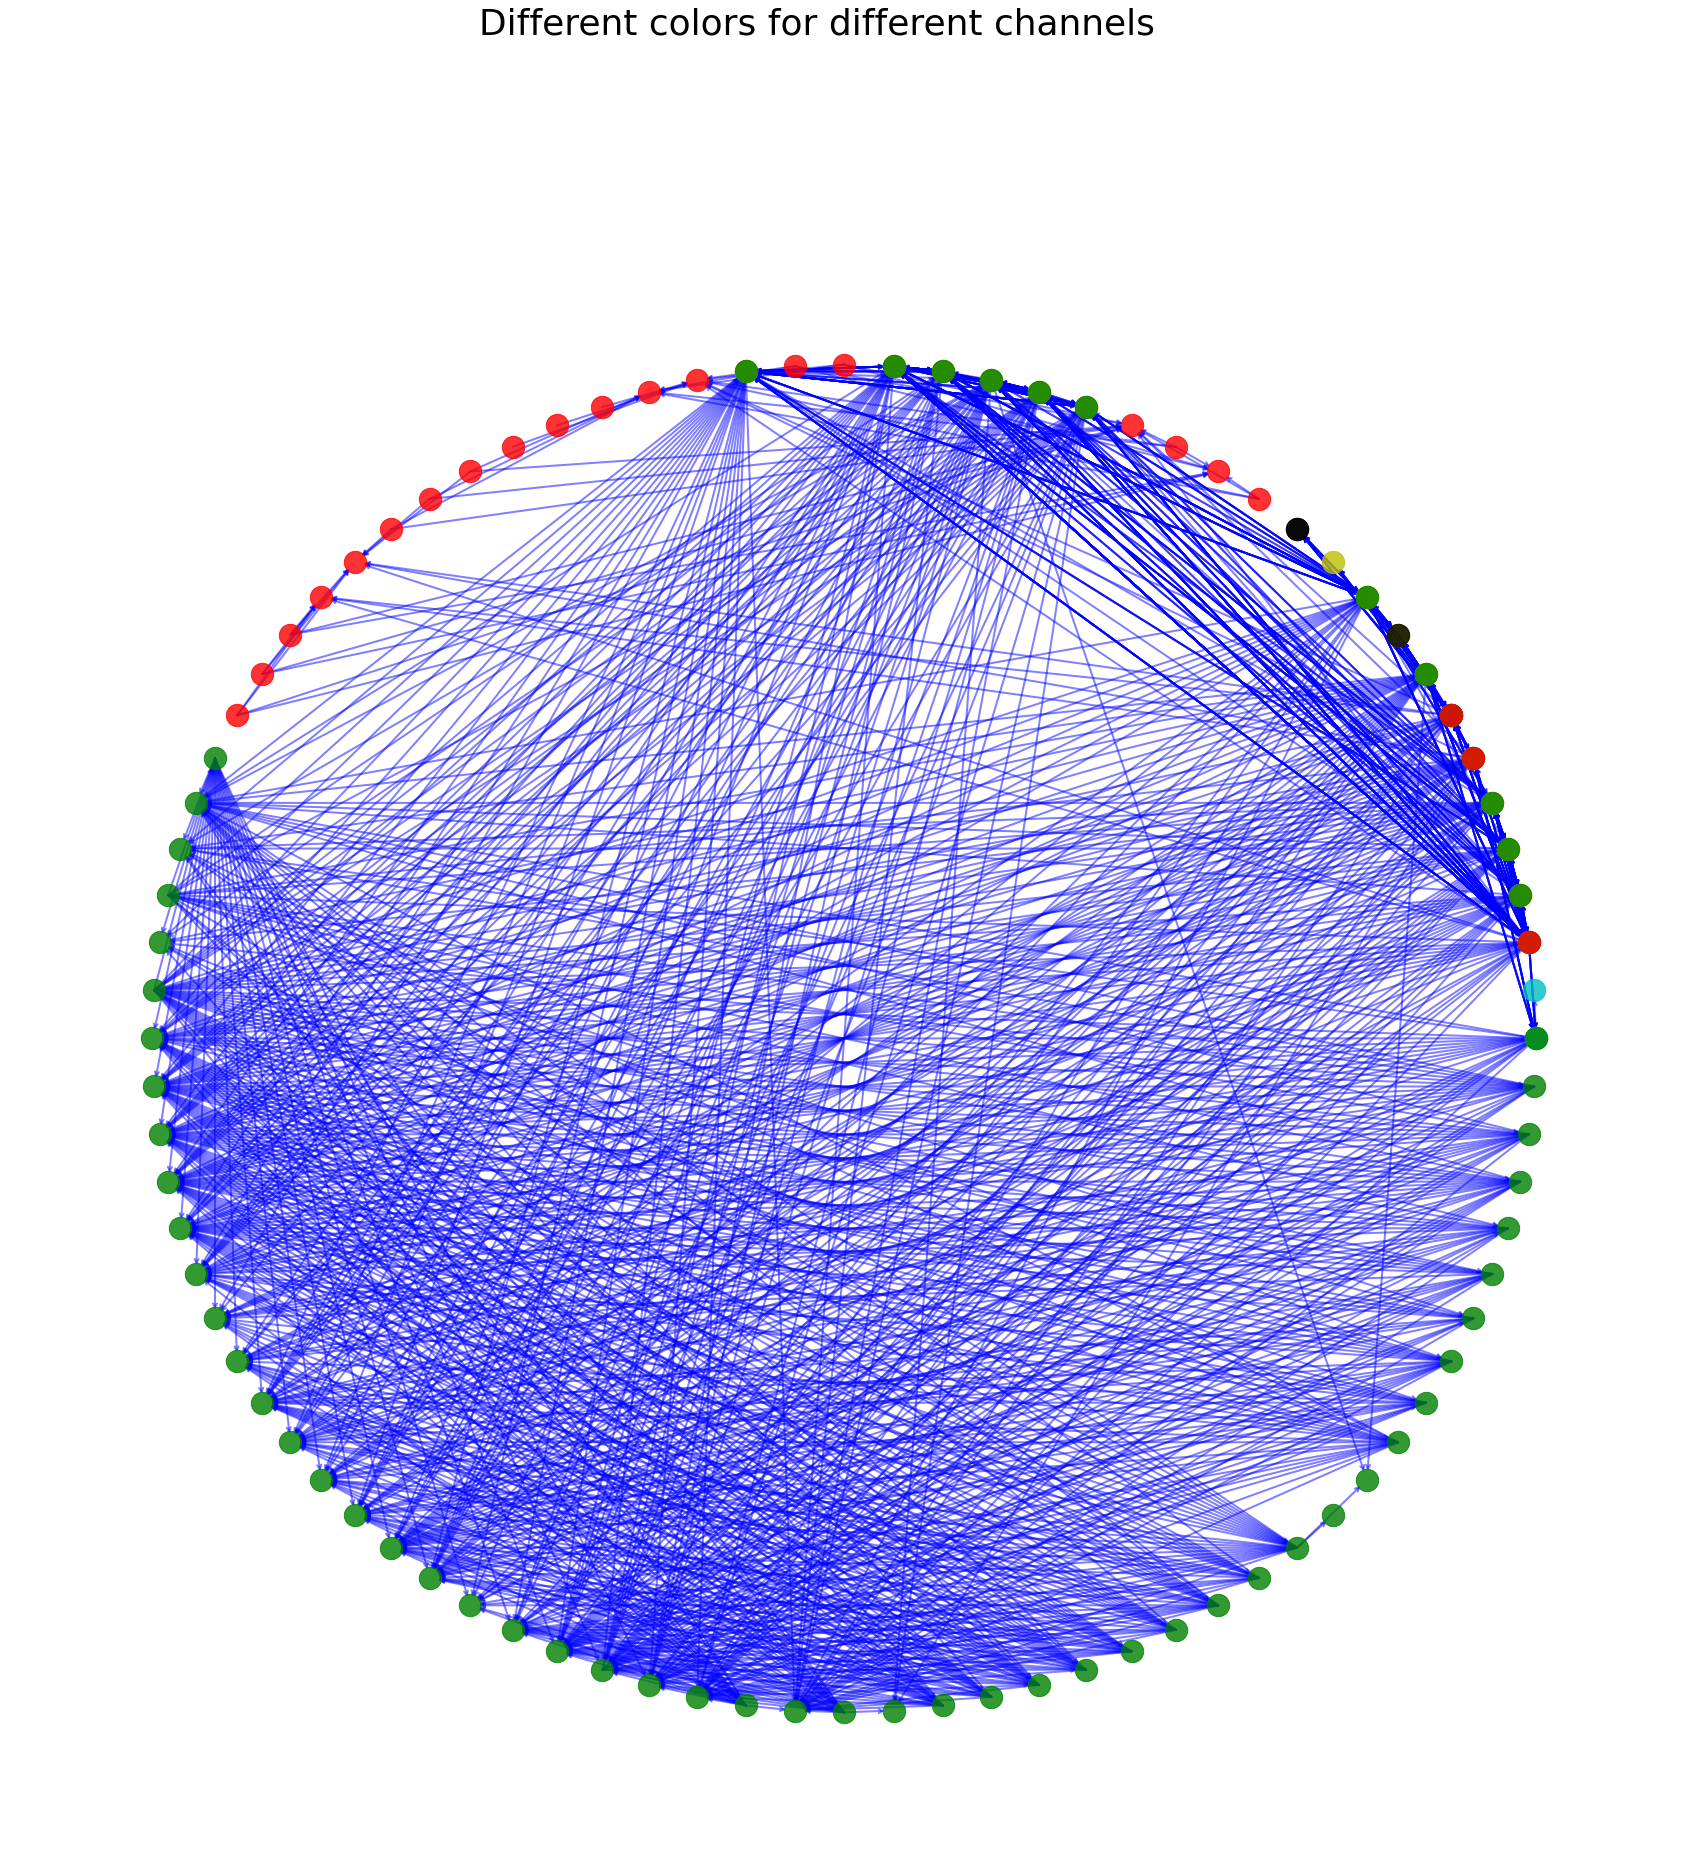

In [0]:

# Setting the graph size
f = plt.figure(figsize=(30,30))

# adding a title for the whole graph
f.suptitle('Different colors for different channels', fontsize=36)

nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[0],
                       node_color='y',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[1],
                       node_color='y',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[2],
                       node_color='k',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[3],
                       node_color='k',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[4],
                       node_color='c',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[5],
                       node_color='g',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(GTemplateTest,pos,
                       nodelist=uniqueTemplate[6],
                       node_color='r',
                       node_size=500,
                   alpha=0.8)


# edges
#nx.draw_networkx_edges(GTemplateTest,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(GTemplateTest,pos,
                       edgelist=templateNodesTuple,
                       width=2,
                       alpha=0.5,
                       edge_color='b',
                       arrowstyle='->')



plt.axis('off')
#plt.savefig("labels_and_colors.png") # save as png
plt.show()

### Graph 1 info:

In [0]:
print("Number of unique values for Source column in the Graph dataset: ", len(dfGraph1["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfGraph1[(dfGraph1["eType"] == 2) | (dfGraph1["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfGraph1[dfGraph1["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfGraph1[dfGraph1["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfGraph1[dfGraph1["eType"] == 6]["Source"].drop_duplicates()))

Number of unique values for Source column in the Graph dataset:  58
Number of unique values for Source column in eType = 0 or 1:  17
Number of unique values for Source column in eType = 2 or 3:  2
Number of unique values for Source column in eType = 4:  1
Number of unique values for Source column in eType = 5:  47
Number of unique values for Source column in eType = 6:  13


In [0]:
print("Number of unique values for Target column in the Graph dataset: ", len(dfGraph1["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfGraph1[(dfGraph1["eType"] == 0) | (dfGraph1["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfGraph1[(dfGraph1["eType"] == 2) | (dfGraph1["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfGraph1[dfGraph1["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfGraph1[dfGraph1["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfGraph1[dfGraph1["eType"] == 6]["Target"].drop_duplicates()))

Number of unique values for Target column in the Graph dataset:  81
Number of unique values for Target column in eType = 0 or 1:  20
Number of unique values for Target column in eType = 2 or 3:  1
Number of unique values for Target column in eType = 4:  1
Number of unique values for Target column in eType = 5:  71
Number of unique values for Target column in eType = 6:  6


### Graph 2 info:

In [0]:
print("Number of unique values for Source column in the Graph dataset: ", len(dfGraph["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Source"].drop_duplicates()))

In [0]:
print("Number of unique values for Target column in the Graph dataset: ", len(dfGraph["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Target"].drop_duplicates()))

### Graph 3 info:

In [0]:
print("Number of unique values for Source column in the Graph dataset: ", len(dfGraph["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Source"].drop_duplicates()))

In [0]:
print("Number of unique values for Target column in the Graph dataset: ", len(dfGraph["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Target"].drop_duplicates()))

### Graph 4 info:

In [0]:
print("Number of unique values for Source column in the Graph dataset: ", len(dfGraph["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Source"].drop_duplicates()))

In [0]:
print("Number of unique values for Target column in the Graph dataset: ", len(dfGraph["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Target"].drop_duplicates()))

### Graph 5 info:

In [0]:
print("Number of unique values for Source column in the Graph dataset: ", len(dfGraph["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Source"].drop_duplicates()))
print("Number of unique values for Source column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Source"].drop_duplicates()))

In [0]:
print("Number of unique values for Target column in the Graph dataset: ", len(dfGraph["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 0 or 1: ", 
      len(dfGraph[(dfGraph["eType"] == 0) | (dfGraph["eType"] == 1)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 2 or 3: ", 
      len(dfGraph[(dfGraph["eType"] == 2) | (dfGraph["eType"] == 3)]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 4: ", 
      len(dfGraph[dfGraph["eType"] == 4]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 5: ", 
      len(dfGraph[dfGraph["eType"] == 5]["Target"].drop_duplicates()))
print("Number of unique values for Target column in eType = 6: ", 
      len(dfGraph[dfGraph["eType"] == 6]["Target"].drop_duplicates()))

### Data description of graphs

In [0]:
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph1.describe()

Source        eType  ...  TargetLatitude  TargetLongitude
count    1216.000000  1216.000000  ...      168.000000       168.000000
mean   566372.039474     3.800987  ...        4.170833       -17.573504
std     54790.757705     2.059174  ...       26.369127        81.208493
min    463777.000000     0.000000  ...      -29.000000      -165.000000
25%    512397.000000     1.000000  ...      -22.000000       -48.670100
50%    570411.000000     5.000000  ...        1.000000       -37.807600
75%    616050.000000     5.000000  ...       30.448300        89.421700
max    654981.000000     6.000000  ...       35.880600       156.000000

[8 rows x 11 columns]

In [0]:
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph2.describe()

Source        eType  ...  TargetLatitude  TargetLongitude
count    1300.000000  1300.000000  ...      201.000000       201.000000
mean   560520.766154     3.451538  ...      -12.701554       -85.900864
std     51698.445422     2.199438  ...       13.219904        95.522699
min    464459.000000     0.000000  ...      -29.452400      -168.472000
25%    527597.000000     1.000000  ...      -25.422000      -162.983000
50%    552988.000000     5.000000  ...      -20.656500      -111.678000
75%    602912.000000     5.000000  ...       -1.160670        -9.461840
max    656156.000000     6.000000  ...        6.715180        91.784100

[8 rows x 11 columns]

In [0]:
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph3.describe()

Source       eType  ...  TargetLatitude  TargetLongitude
count     729.000000  729.000000  ...       88.000000        88.000000
mean   549315.914952    3.980796  ...       -6.859568       -20.845032
std     45556.232718    1.995782  ...       22.110683       106.346714
min    464459.000000    0.000000  ...      -29.171400      -165.000000
25%    516236.000000    5.000000  ...      -23.595300      -111.000000
50%    542649.000000    5.000000  ...      -21.141100       -26.695200
75%    578531.000000    5.000000  ...        5.911780        91.000000
max    657076.000000    6.000000  ...       33.574100       156.000000

[8 rows x 11 columns]

In [0]:
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph4.describe()

Source       eType  ...  TargetLatitude  TargetLongitude
count     732.000000  732.000000  ...      176.000000       176.000000
mean   557659.424863    4.463115  ...        0.518587       -35.924931
std     55986.115278    1.694121  ...       25.551081       106.740120
min    464579.000000    0.000000  ...      -35.603400      -168.957000
25%    510031.000000    5.000000  ...      -25.000000      -111.000000
50%    566580.000000    5.000000  ...        1.000000       -41.778000
75%    585606.000000    5.000000  ...       22.107250       -11.437250
max    657526.000000    6.000000  ...       39.888600       156.256000

[8 rows x 11 columns]

In [0]:
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')
dfGraph5.describe()

Source       eType  ...  TargetLatitude  TargetLongitude
count     395.000000  395.000000  ...      124.000000       124.000000
mean   553140.425316    4.635443  ...        6.701998       -13.750998
std     52601.721710    1.565413  ...       23.400234       119.389382
min    477657.000000    0.000000  ...      -29.000000      -170.646000
25%    510031.000000    5.000000  ...      -22.000000      -111.000000
50%    552988.000000    5.000000  ...       22.000000       -41.000000
75%    594308.000000    6.000000  ...       23.280775       152.200000
max    631903.000000    6.000000  ...       33.000000       156.000000

[8 rows x 11 columns]

## Testing the network graph

In [0]:
import networkx as nx

In [0]:
G = nx.Graph()

In [0]:
templateG = nx.Graph()
graph1G = nx.Graph()
graph2G = nx.Graph()
graph3G = nx.Graph()
graph4G = nx.Graph()
graph5G = nx.Graph()

In [0]:
G.number_of_nodes()

0

In [0]:
G.number_of_edges()

969311

In [0]:
sampleFromBigGraph01 = dfBigGraph.iloc[0:10000,[0,2]]
sampleFromBigGraph01

Source  Target
0     639754  643327
1     603100  643327
2     577847  643327
3     466246  643327
4     633499  549896
...      ...     ...
9995  623708  644118
9996  535817  644118
9997  603884  644118
9998  641144  644118
9999  579138  644118

[10000 rows x 2 columns]

In [0]:
templateNodesTuple = [tuple([x, y]) for x, y in zip(dfTemplate["Source"], dfTemplate["Target"])]
graph1NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph1["Source"], dfGraph1["Target"])]
graph2NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph2["Source"], dfGraph2["Target"])]
graph3NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph3["Source"], dfGraph3["Target"])]
graph4NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph4["Source"], dfGraph4["Target"])]
graph5NodesTuple = [tuple([x, y]) for x, y in zip(dfGraph5["Source"], dfGraph5["Target"])]

In [0]:
templateG.add_edges_from(templateNodesTuple)
graph1G.add_edges_from(graph1NodesTuple)
graph2G.add_edges_from(graph2NodesTuple)
graph3G.add_edges_from(graph3NodesTuple)
graph4G.add_edges_from(graph4NodesTuple)
graph5G.add_edges_from(graph5NodesTuple)

In [0]:
print("Template network has ", templateG.number_of_edges(), " edges and ", templateG.number_of_nodes(), " nodes")
print("Graph1 network has ", graph1G.number_of_edges(), " edges and ", graph1G.number_of_nodes(), " nodes")
print("Graph2 network has ", graph2G.number_of_edges(), " edges and ", graph2G.number_of_nodes(), " nodes")
print("Graph3 network has ", graph3G.number_of_edges(), " edges and ", graph3G.number_of_nodes(), " nodes")
print("Graph4 network has ", graph4G.number_of_edges(), " edges and ", graph4G.number_of_nodes(), " nodes")
print("Graph5 network has ", graph5G.number_of_edges(), " edges and ", graph5G.number_of_nodes(), " nodes")

Template network has  813  edges and  88  nodes
Graph1 network has  949  edges and  93  nodes
Graph2 network has  915  edges and  87  nodes
Graph3 network has  590  edges and  79  nodes
Graph4 network has  607  edges and  87  nodes
Graph5 network has  285  edges and  86  nodes


#### some details about the graphs of question 1

In [0]:
print("Template node list:\n", list(templateG.nodes))
print("Graph1 node list:\n", list(graph1G.nodes))
print("Graph2 node list:\n", list(graph2G.nodes))
print("Graph3 node list:\n", list(graph3G.nodes))
print("Graph4 node list:\n", list(graph4G.nodes))
print("Graph5 node list:\n", list(graph5G.nodes))

Template node list:
 [0, -99, 41, 34, 37, 27, 40, 39, 65, 67, 47, 66, 657187, 78, 81, 80, 70, 43, 56, 57, 58, 63, 77, 79, 45, 69, 76, 82, 83, 84, 73, 75, 74, 71, 72, 87, 85, 86, 2, 630626, 536346, 510031, 520660, 552988, 567195, 527449, 459381, 595298, 466907, 589943, 577992, 537281, 523927, 580426, 595581, 642329, 503701, 571970, 644226, 632961, 473173, 620120, 621924, 616315, 29, 575030, 31, 503218, 33, 35, 36, 38, 42, 44, 46, 48, 49, 640784, 606730, 52, 53, 54, 55, 59, 60, 61, 62, 64]
Graph1 node list:
 [616050, 590502, 599956, 635665, 490041, 589639, 533140, 591682, 568093, 632150, 464459, 512397, 550287, 559657, 623295, 492777, 570411, 550361, 493044, 596193, 640464, 657187, 629627, 625756, 657173, 599441, 534034, 585212, 509607, 499467, 538892, 542965, 572391, 561157, 649553, 570284, 643925, 616453, 608827, 630626, 552988, 567195, 527449, 459381, 595298, 466907, 589943, 537281, 580426, 595581, 616315, 642329, 503701, 632961, 473173, 620120, 575030, 621924, 536346, 510031, 520660,

In [0]:
print("Template: ", nx.transitivity(templateG))
print("Graph1: ", nx.transitivity(graph1G))
print("Graph2: ", nx.transitivity(graph2G))
print("Graph3: ", nx.transitivity(graph3G))
print("Graph4: ", nx.transitivity(graph4G))
print("Graph5: ", nx.transitivity(graph5G))

Template:  0.16859122401847576
Graph1:  0.11303058238807166
Graph2:  0.12384809289640068
Graph3:  0.11512877366535904
Graph4:  0.222864768683274
Graph5:  0.21711899791231734


In [0]:
print("Number of triangles for each node in the Template:\n", nx.triangles(templateG))
print("Number of triangles for each node in the Graph1:\n", nx.triangles(graph1G))
print("Number of triangles for each node in the Graph2:\n", nx.triangles(graph2G))
print("Number of triangles for each node in the Graph3:\n", nx.triangles(graph3G))
print("Number of triangles for each node in the Graph4:\n", nx.triangles(graph4G))
print("Number of triangles for each node in the Graph5:\n", nx.triangles(graph5G))

Number of triangles for each node in the Template:
 {0: 48, -99: 0, 41: 251, 34: 170, 37: 180, 27: 189, 40: 73, 39: 60, 65: 64, 67: 2, 47: 175, 66: 0, 657187: 1, 78: 0, 81: 0, 80: 0, 70: 3, 43: 191, 56: 190, 57: 189, 58: 167, 63: 195, 77: 0, 79: 0, 45: 211, 69: 3, 76: 0, 82: 0, 83: 0, 84: 0, 73: 0, 75: 0, 74: 0, 71: 3, 72: 3, 87: 0, 85: 0, 86: 0, 2: 0, 630626: 21, 536346: 7, 510031: 13, 520660: 3, 552988: 64, 567195: 50, 527449: 64, 459381: 64, 595298: 64, 466907: 42, 589943: 50, 577992: 8, 537281: 20, 523927: 37, 580426: 26, 595581: 18, 642329: 24, 503701: 45, 571970: 46, 644226: 7, 632961: 29, 473173: 64, 620120: 64, 621924: 23, 616315: 30, 29: 0, 575030: 33, 31: 0, 503218: 1, 33: 0, 35: 0, 36: 0, 38: 0, 42: 0, 44: 0, 46: 0, 48: 0, 49: 0, 640784: 0, 606730: 0, 52: 0, 53: 0, 54: 0, 55: 0, 59: 0, 60: 0, 61: 0, 62: 0, 64: 0}
Number of triangles for each node in the Graph1:
 {616050: 73, 590502: 0, 599956: 191, 635665: 233, 490041: 150, 589639: 91, 533140: 84, 591682: 42, 568093: 89, 632

#### Different channels network graphs

### Test for plotting

In [0]:
sampleFromBigGraph01Tuple = [tuple([x, y]) for x, y in zip(sampleFromBigGraph01["Source"], sampleFromBigGraph01["Target"])]

In [0]:
G.add_edges_from(sampleFromBigGraph01Tuple)

In [0]:
#G.add_edges_from([tuple([x, y]) for x, y in zip(sampleFromBigGraph01["Source"], sampleFromBigGraph01["Target"])])

In [0]:
import matplotlib.pyplot as plt

In [0]:
plt.subplot(111)
nx.draw(G, with_labels=True, font_weight='bold')

### drawing the network graphs of the template and all the graphs

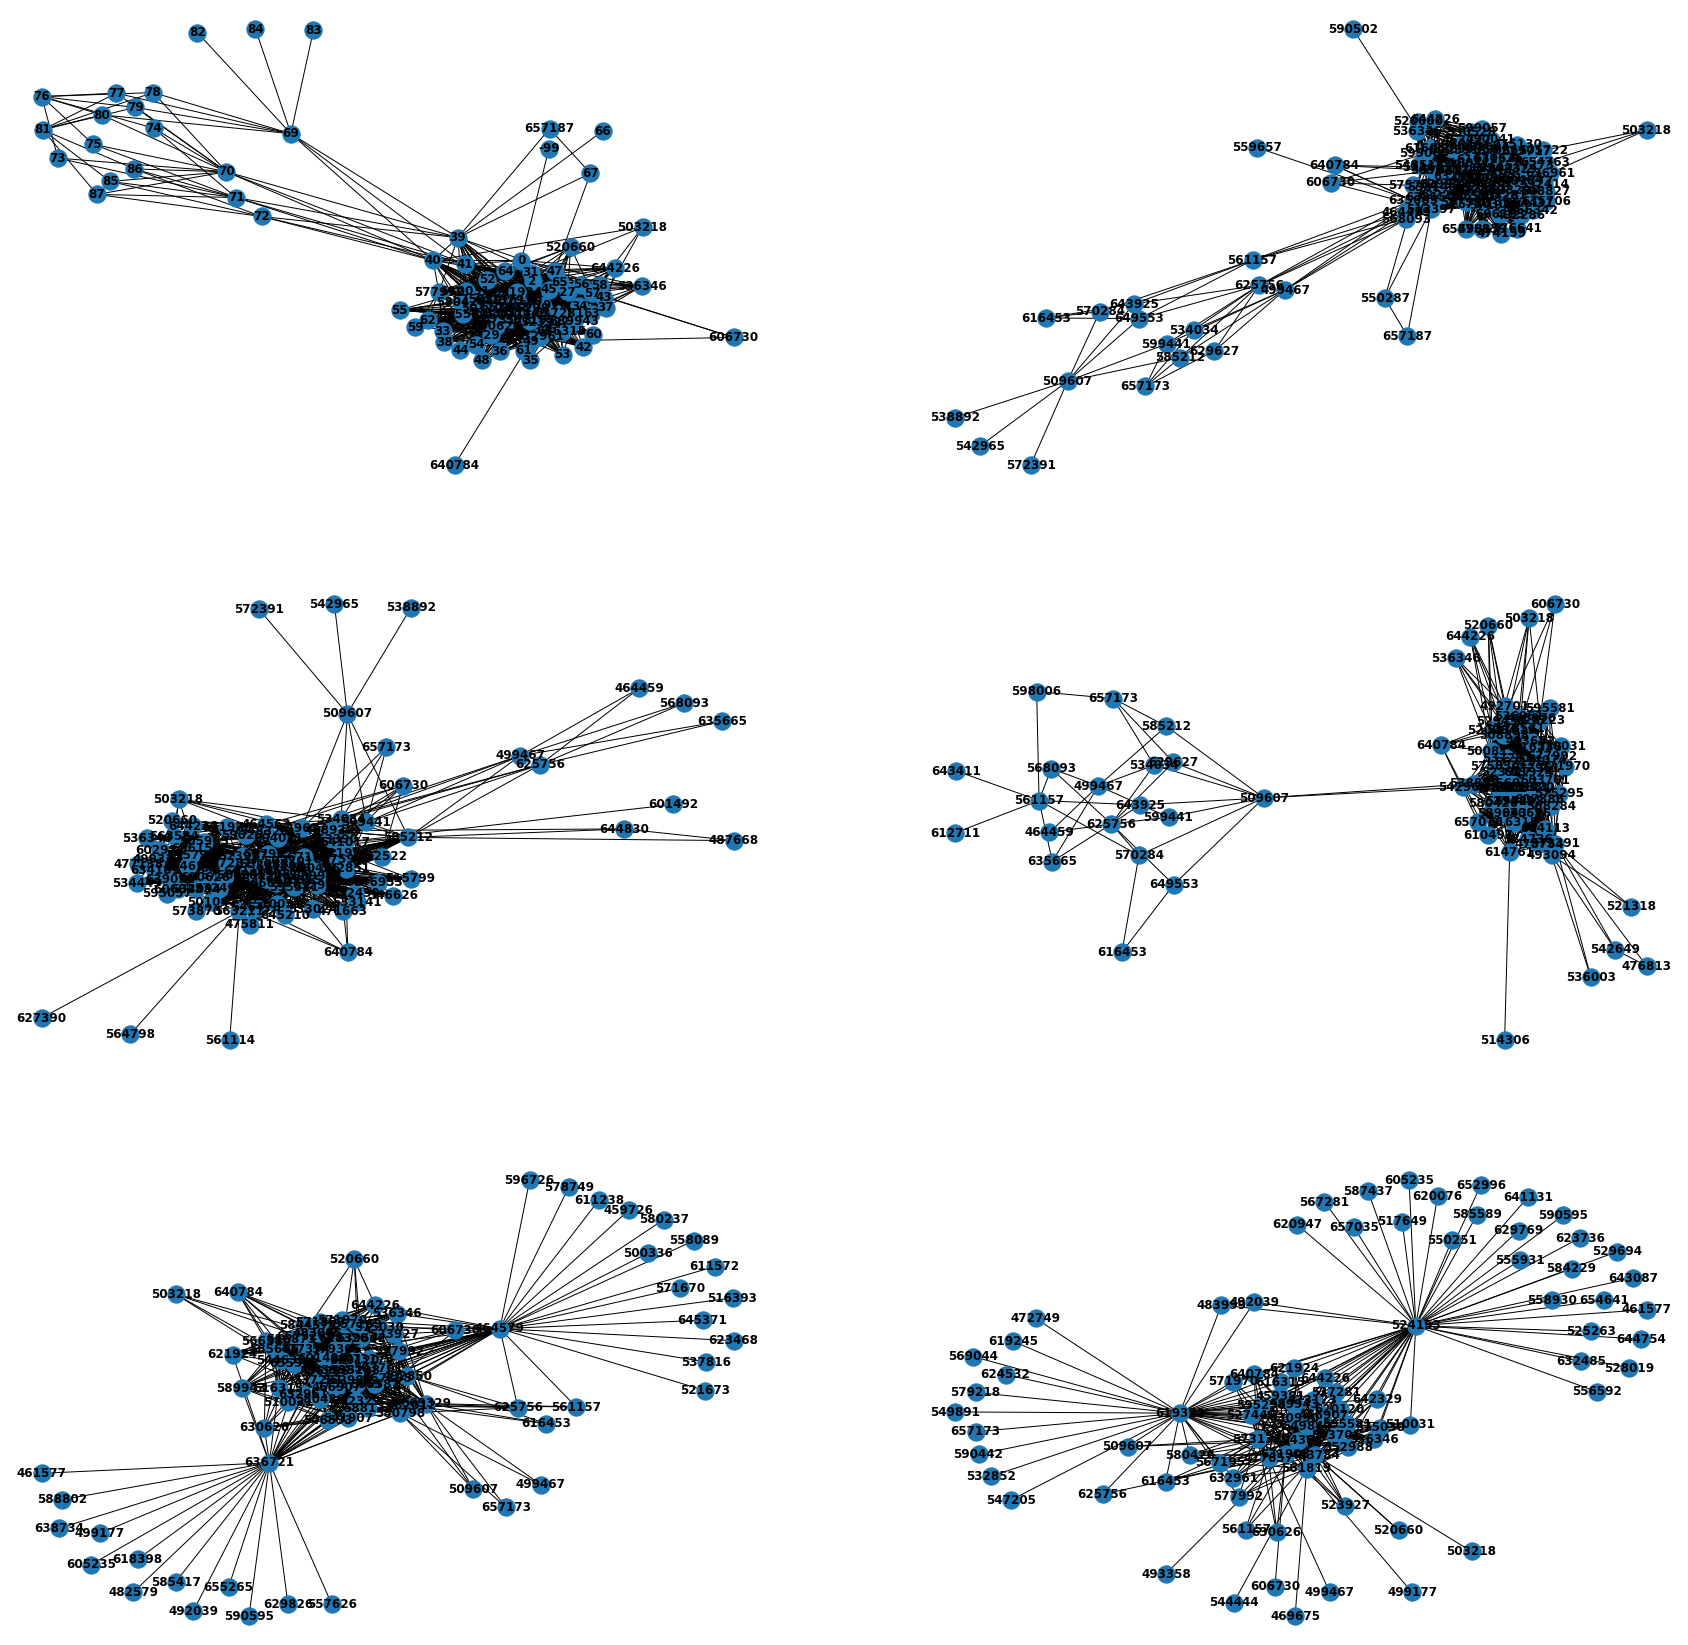

In [0]:
f = plt.figure(figsize=(30,30))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw(templateG, with_labels=True, font_weight='bold')
plt.subplot(322)
nx.draw(graph1G, with_labels=True, font_weight='bold')
plt.subplot(323)
nx.draw(graph2G, with_labels=True, font_weight='bold')
plt.subplot(324)
nx.draw(graph3G, with_labels=True, font_weight='bold')
plt.subplot(325)
nx.draw(graph4G, with_labels=True, font_weight='bold')
plt.subplot(326)
nx.draw(graph5G, with_labels=True, font_weight='bold')

### drawing the network graphs of the template and all the graphs NO Labels

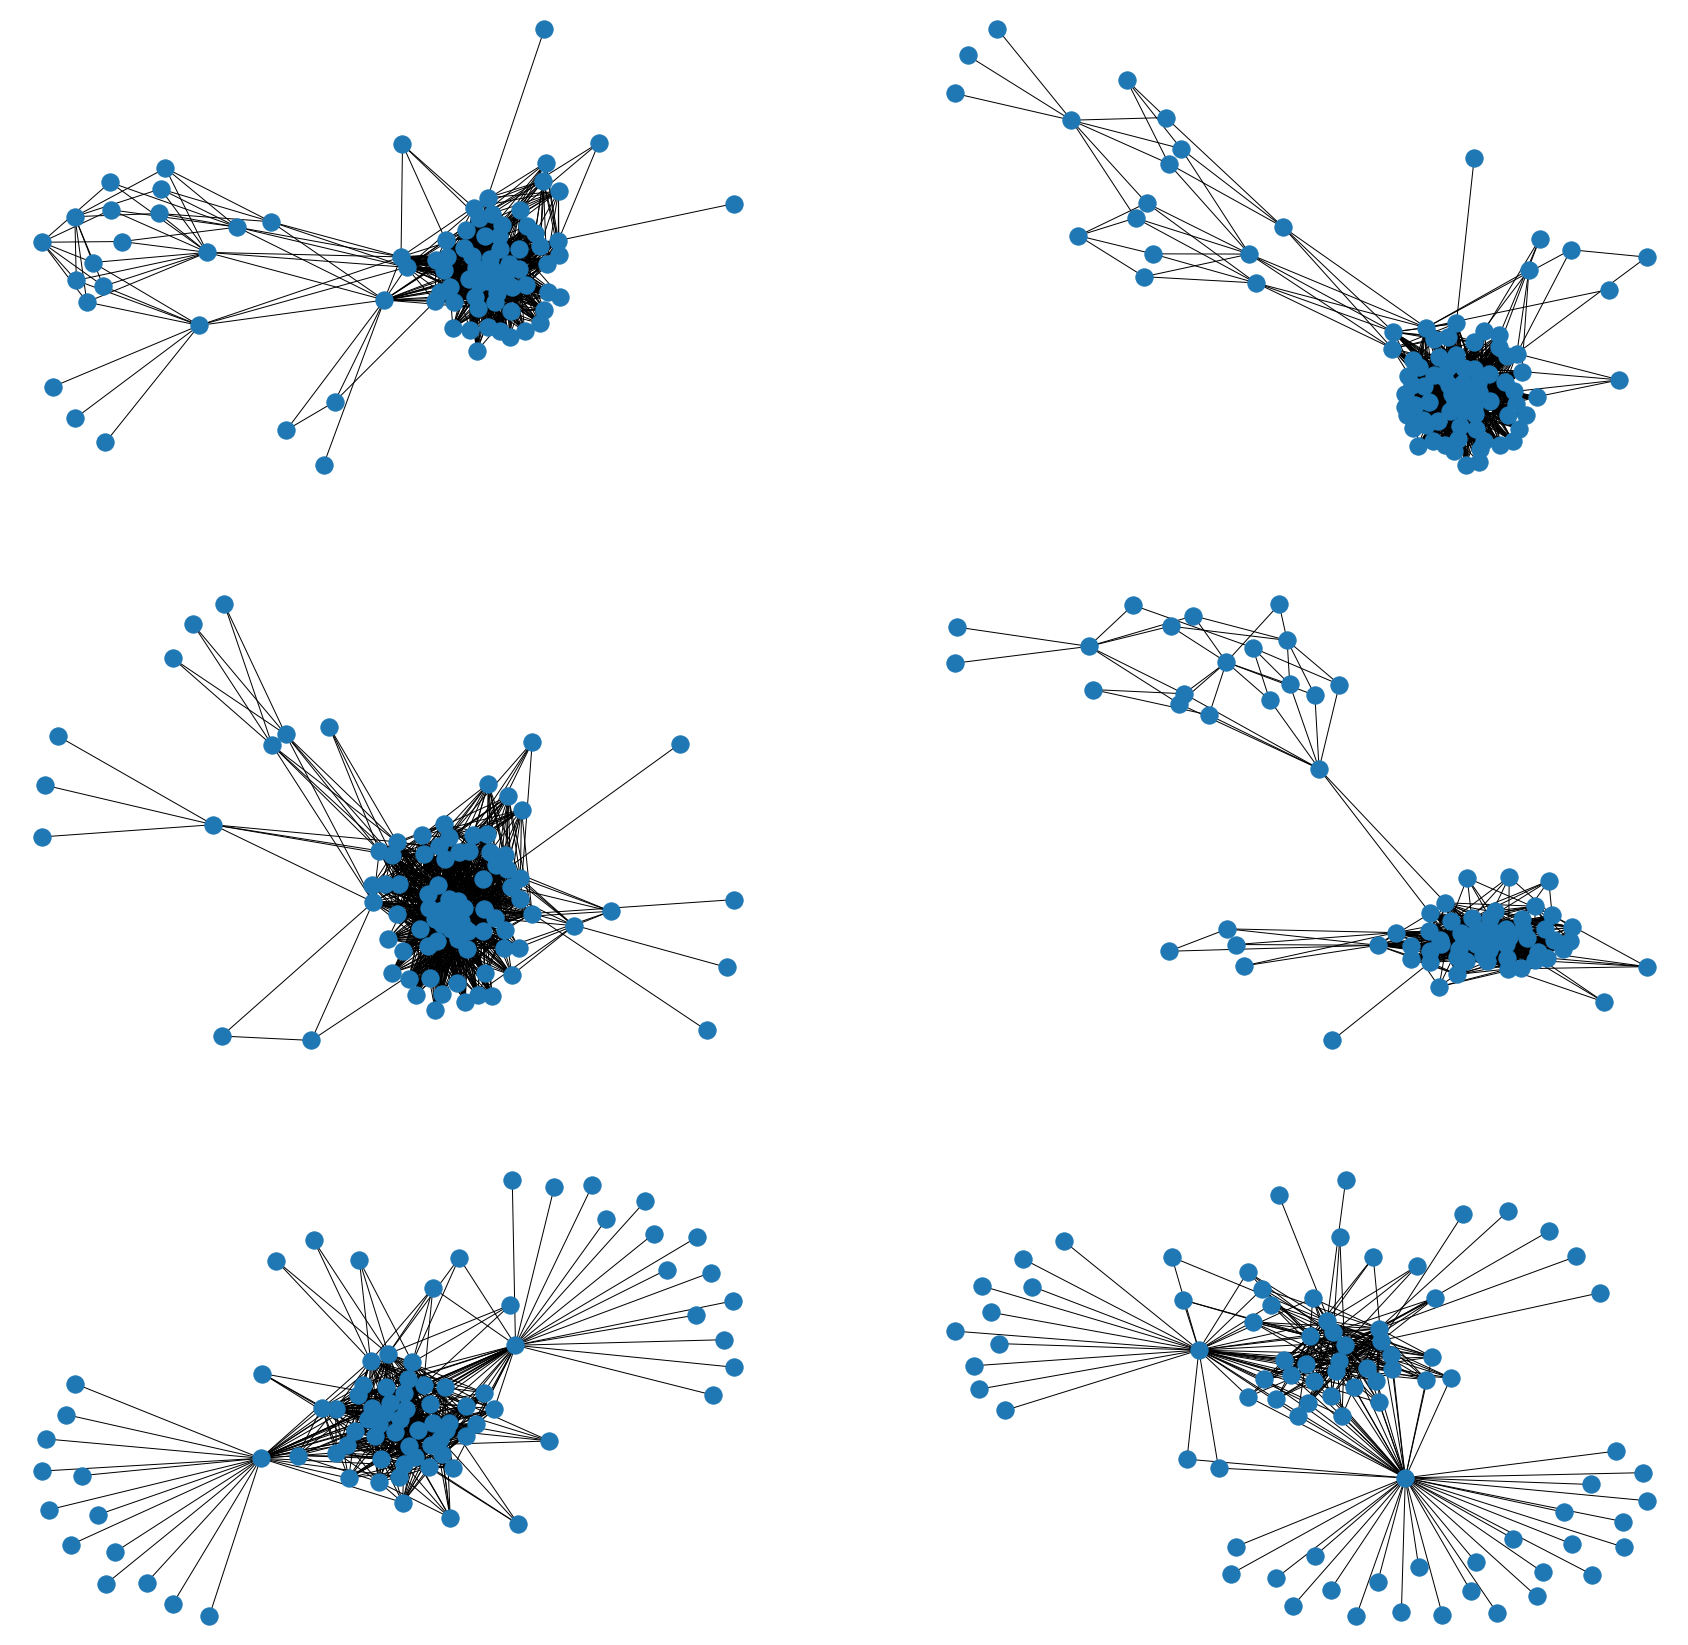

In [0]:
f = plt.figure(figsize=(30,30))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw(templateG, with_labels=False, font_weight='bold')
plt.subplot(322)
nx.draw(graph1G, with_labels=False, font_weight='bold')
plt.subplot(323)
nx.draw(graph2G, with_labels=False, font_weight='bold')
plt.subplot(324)
nx.draw(graph3G, with_labels=False, font_weight='bold')
plt.subplot(325)
nx.draw(graph4G, with_labels=False, font_weight='bold')
plt.subplot(326)
nx.draw(graph5G, with_labels=False, font_weight='bold')

#### Testing different types of graph drawings

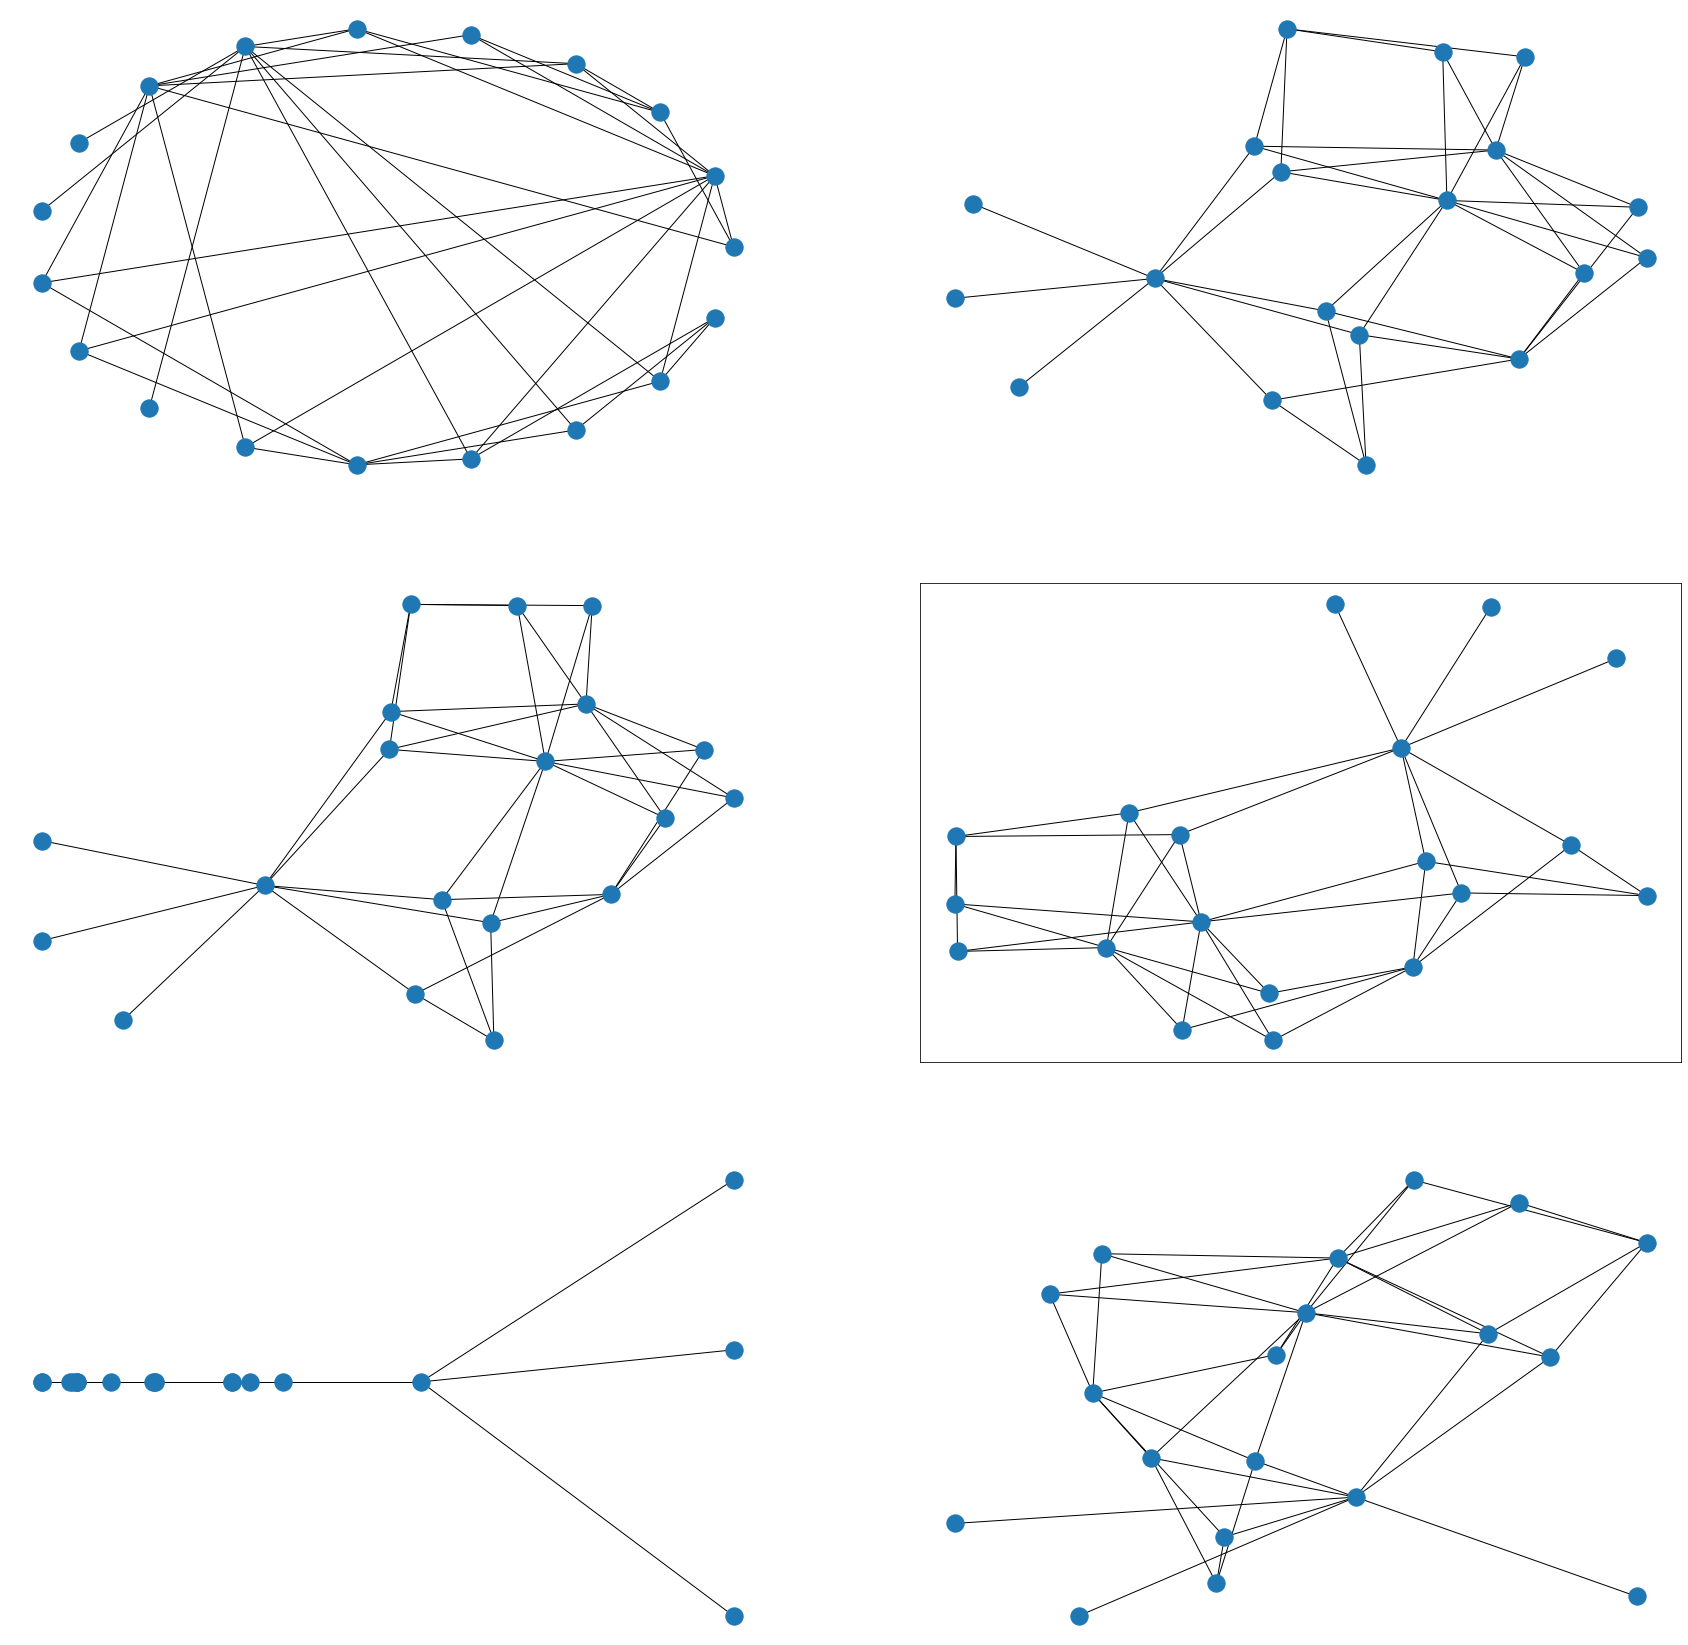

In [0]:
f = plt.figure(figsize=(30,30))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw_circular(graph1G, with_labels=False, font_weight='bold')
plt.subplot(322)
nx.draw_kamada_kawai(graph1G, with_labels=False, font_weight='bold')
plt.subplot(323)
nx.draw(graph1G, with_labels=False, font_weight='bold')
plt.subplot(324)
nx.draw_networkx(graph1G, with_labels=False, font_weight='bold')
plt.subplot(325)
nx.draw_spectral(graph1G, with_labels=False, font_weight='bold')
plt.subplot(326)
nx.draw_spring(graph1G, with_labels=False, font_weight='bold')

### network graphs for each channel test

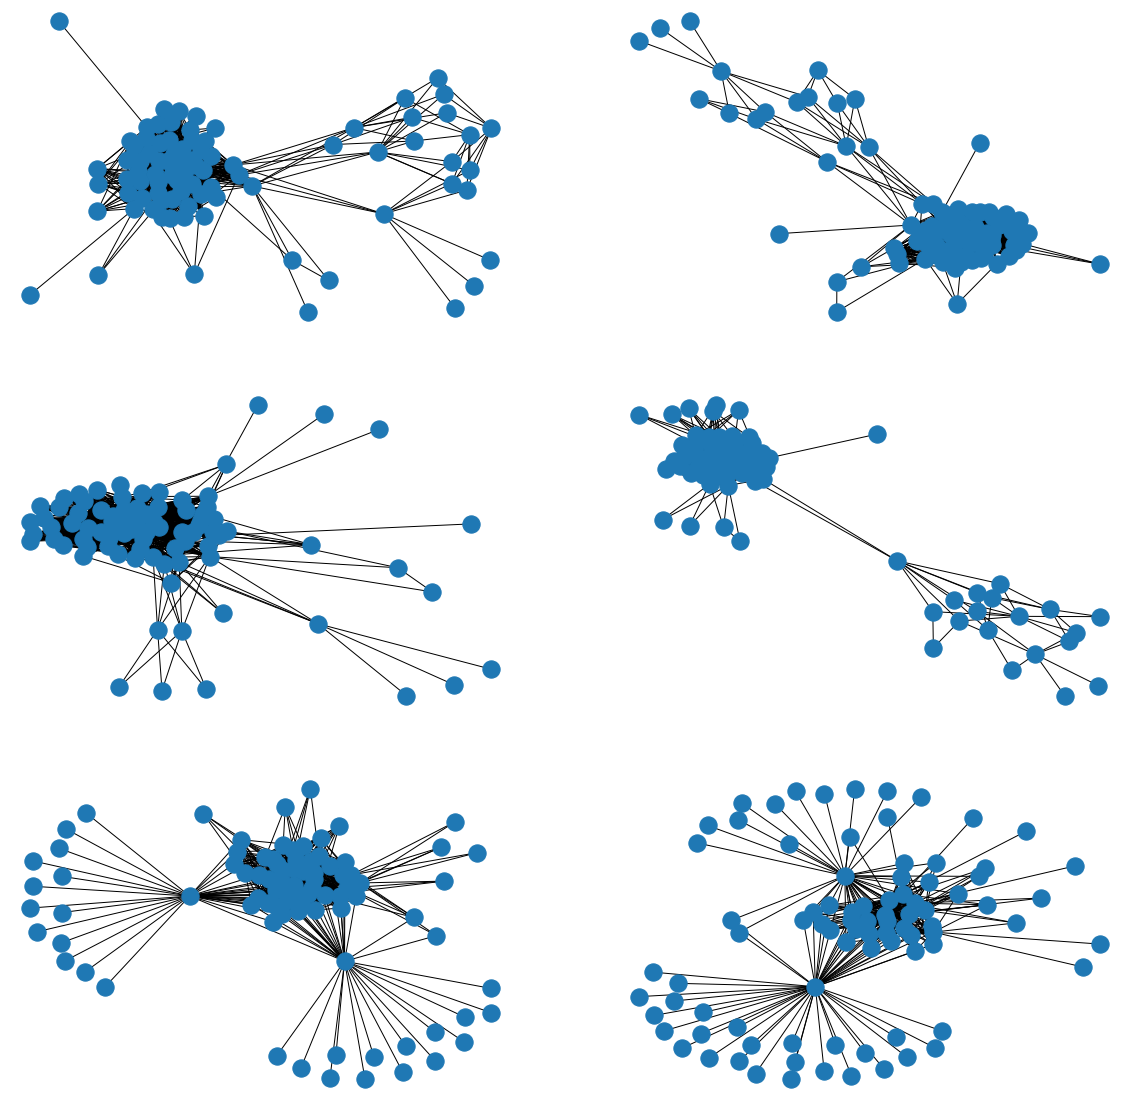

In [0]:
f = plt.figure(figsize=(20,20))
#ax = f.add_subplot(121)
#ax2 = f.add_subplot(122)
plt.subplot(321)
nx.draw(templateG, with_labels=False, font_weight='bold')
plt.subplot(322)
nx.draw(graph1G, with_labels=False, font_weight='bold')
plt.subplot(323)
nx.draw(graph2G, with_labels=False, font_weight='bold')
plt.subplot(324)
nx.draw(graph3G, with_labels=False, font_weight='bold')
plt.subplot(325)
nx.draw(graph4G, with_labels=False, font_weight='bold')
plt.subplot(326)
nx.draw(graph5G, with_labels=False, font_weight='bold')

In [0]:
# for pathT in nx.algorithms.all_simple_paths(templateG, source = 37, target = -99):
#  pass
# print(pathT) 
# approximation.ramsy_R2(templateG)
print(nx.algorithms.all_simple_paths(templateG, source = 37, target = 34))
# nx.algorithms.all_simple_paths(templateG, source = 37, target = -99)
templateGD = nx.DiGraph(templateNodesTuple)

roots = (v for v, d in templateGD.in_degree() if d == 0)
leaves = [v for v, d in templateGD.out_degree() if d == 0]

print(list(roots))
print(list(leaves))
print(type(roots))

<generator object _all_simple_paths_graph at 0x7fd5eea16e60>
[78, 80, 77, 79, 82, 83, 84, 73, 75, 74, 87, 85, 86, 510031, 552988]
[-99, 66, 657187, 81, 70, 69, 76, 71, 72, 630626, 536346, 520660, 567195, 527449, 459381, 595298, 466907, 589943, 577992, 537281, 523927, 580426, 595581, 642329, 503701, 571970, 644226, 632961, 473173, 621924, 616315, 575030, 503218, 640784, 606730]
<class 'generator'>


In [0]:
for nextRoot in roots:
  print(nextRoot)

In [0]:
for nextLeaf in leaves:
  print(nextLeaf)

-99
66
657187
81
70
69
76
71
72
630626
536346
520660
567195
527449
459381
595298
466907
589943
577992
537281
523927
580426
595581
642329
503701
571970
644226
632961
473173
621924
616315
575030
503218
640784
606730


In [0]:
from itertools import chain
from itertools import product
from itertools import starmap
from functools import partial

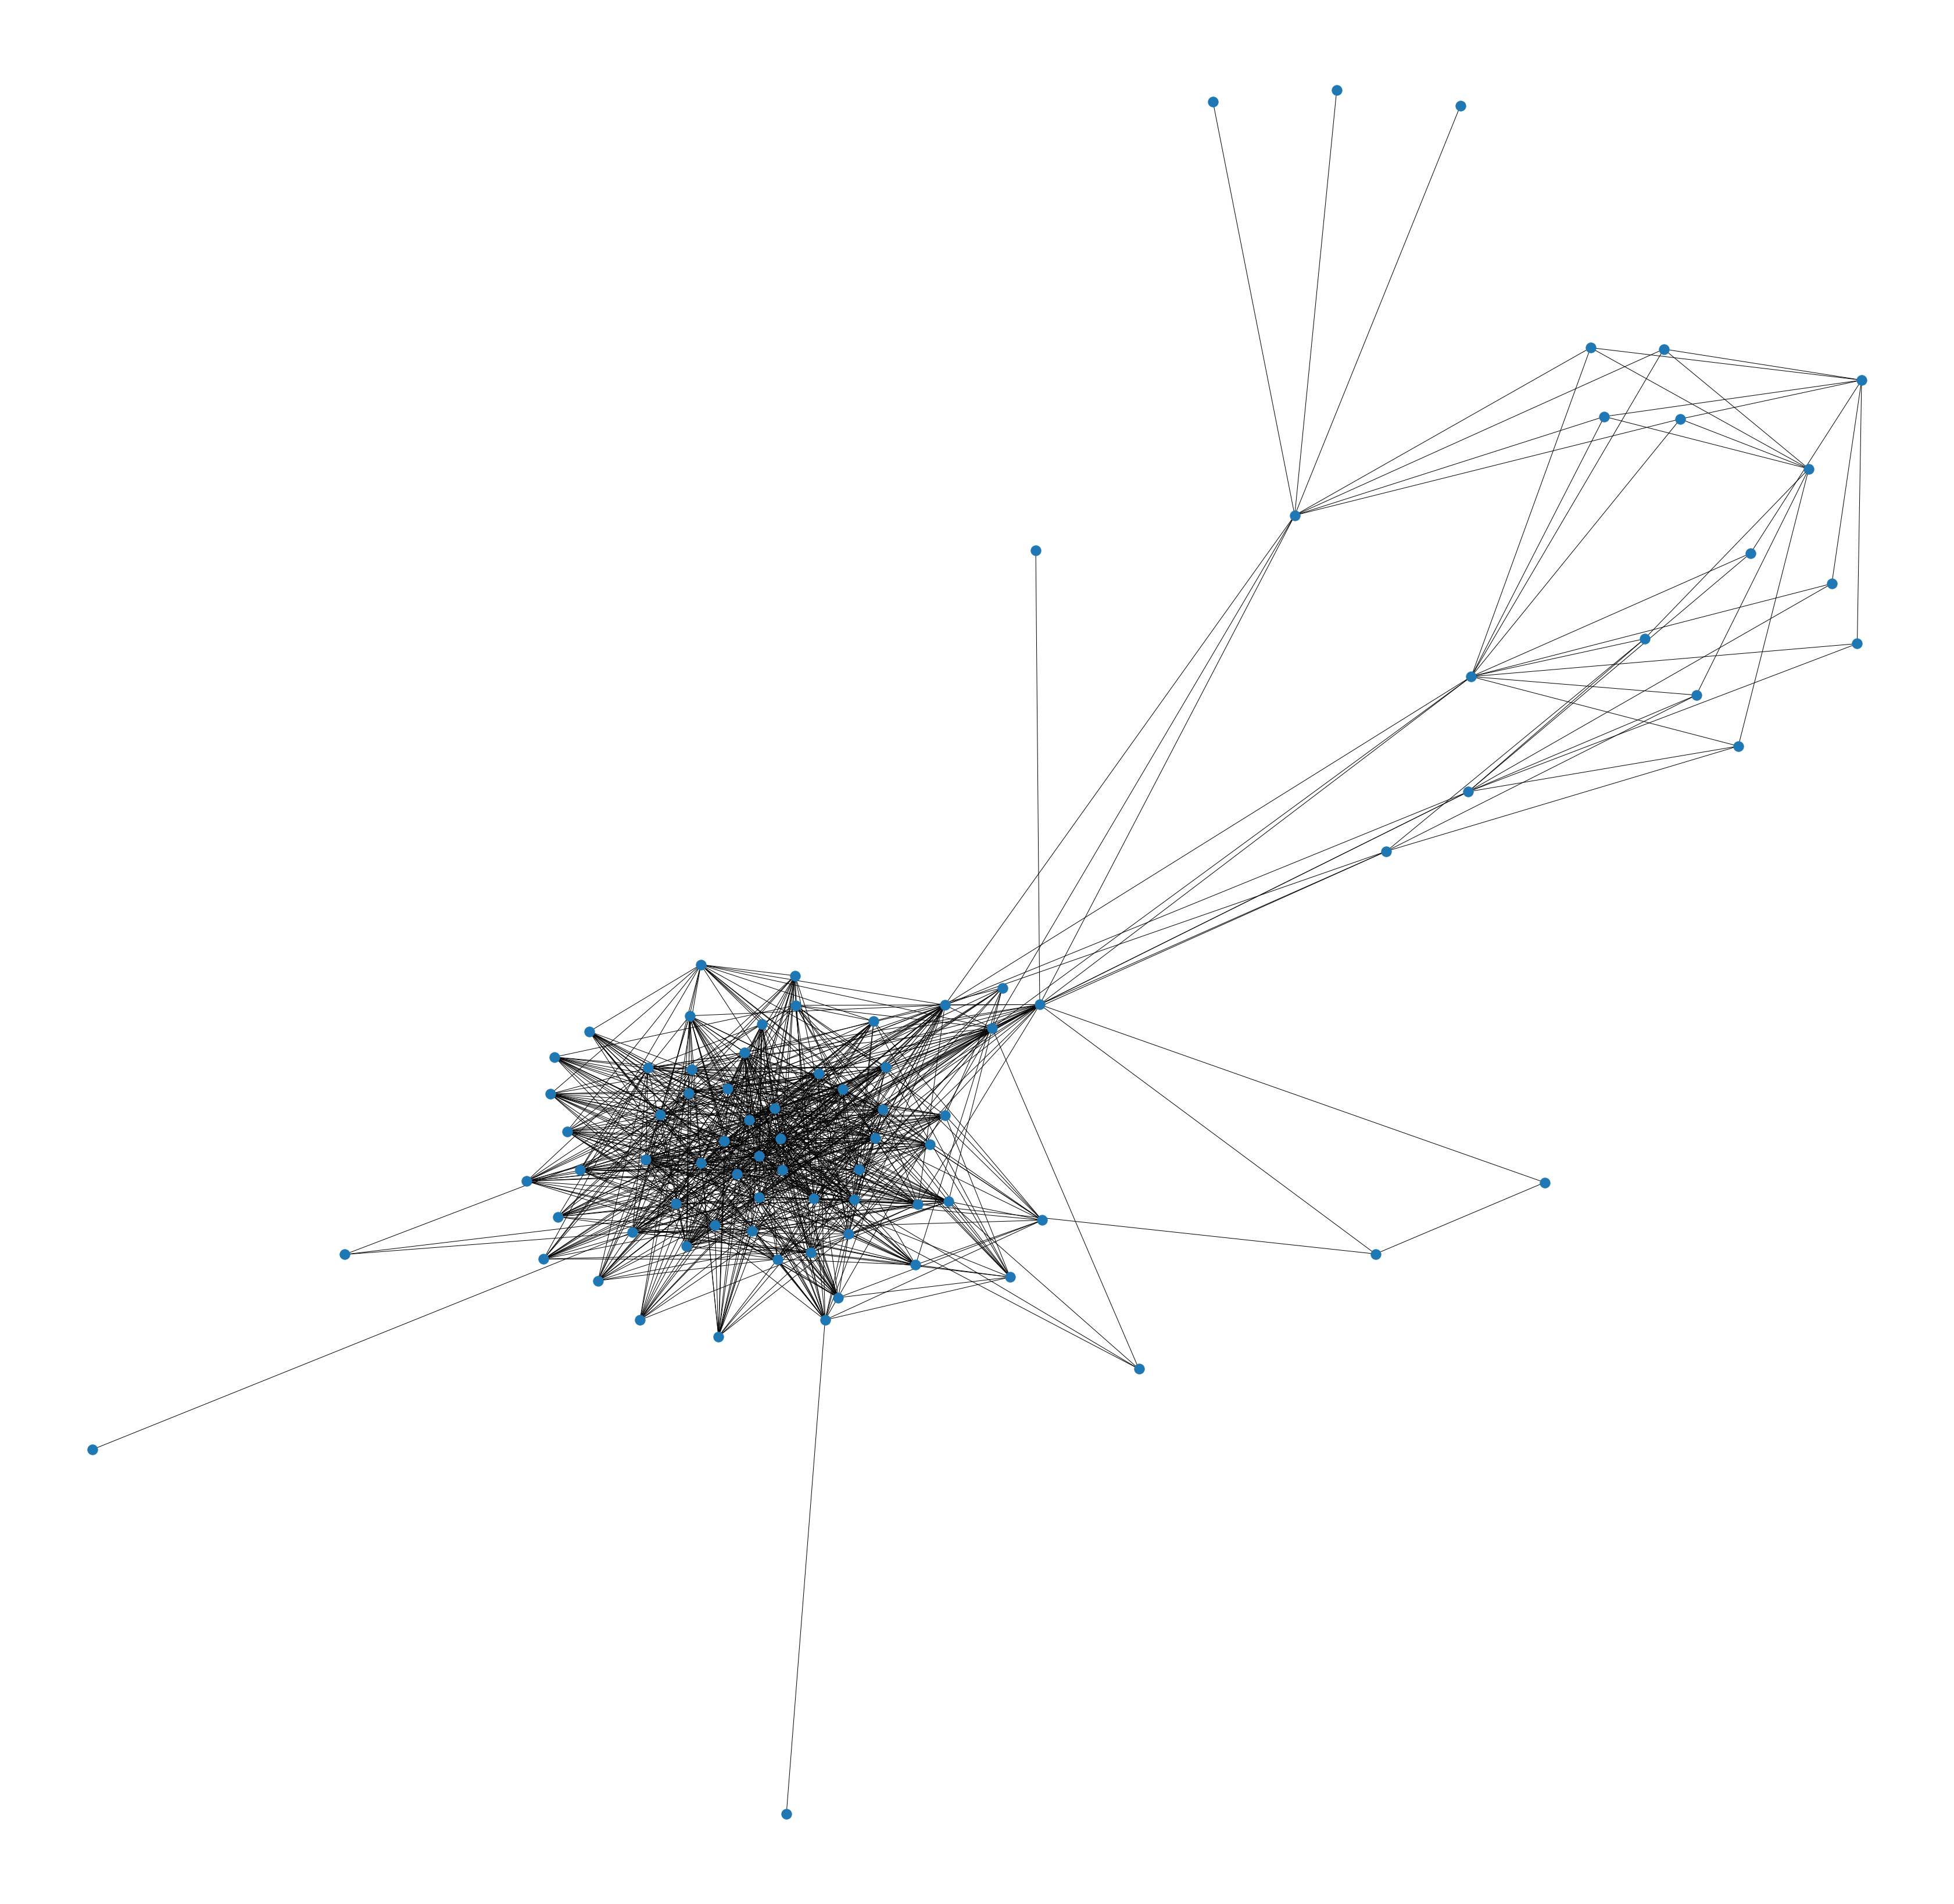

In [0]:
f = plt.figure(figsize=(60,60))
plt.subplot(111)
nx.draw(templateG, with_labels=False, font_weight='bold')

## clustering the big graph

In [0]:
G = nx.Graph()

In [0]:
sampleClusters = nx.clustering(G)

In [0]:
len(sampleClusters)

5070

In [0]:
templateGraphClusters = nx.clustering(templateG)

### a network graph of sample size of 10 thousands

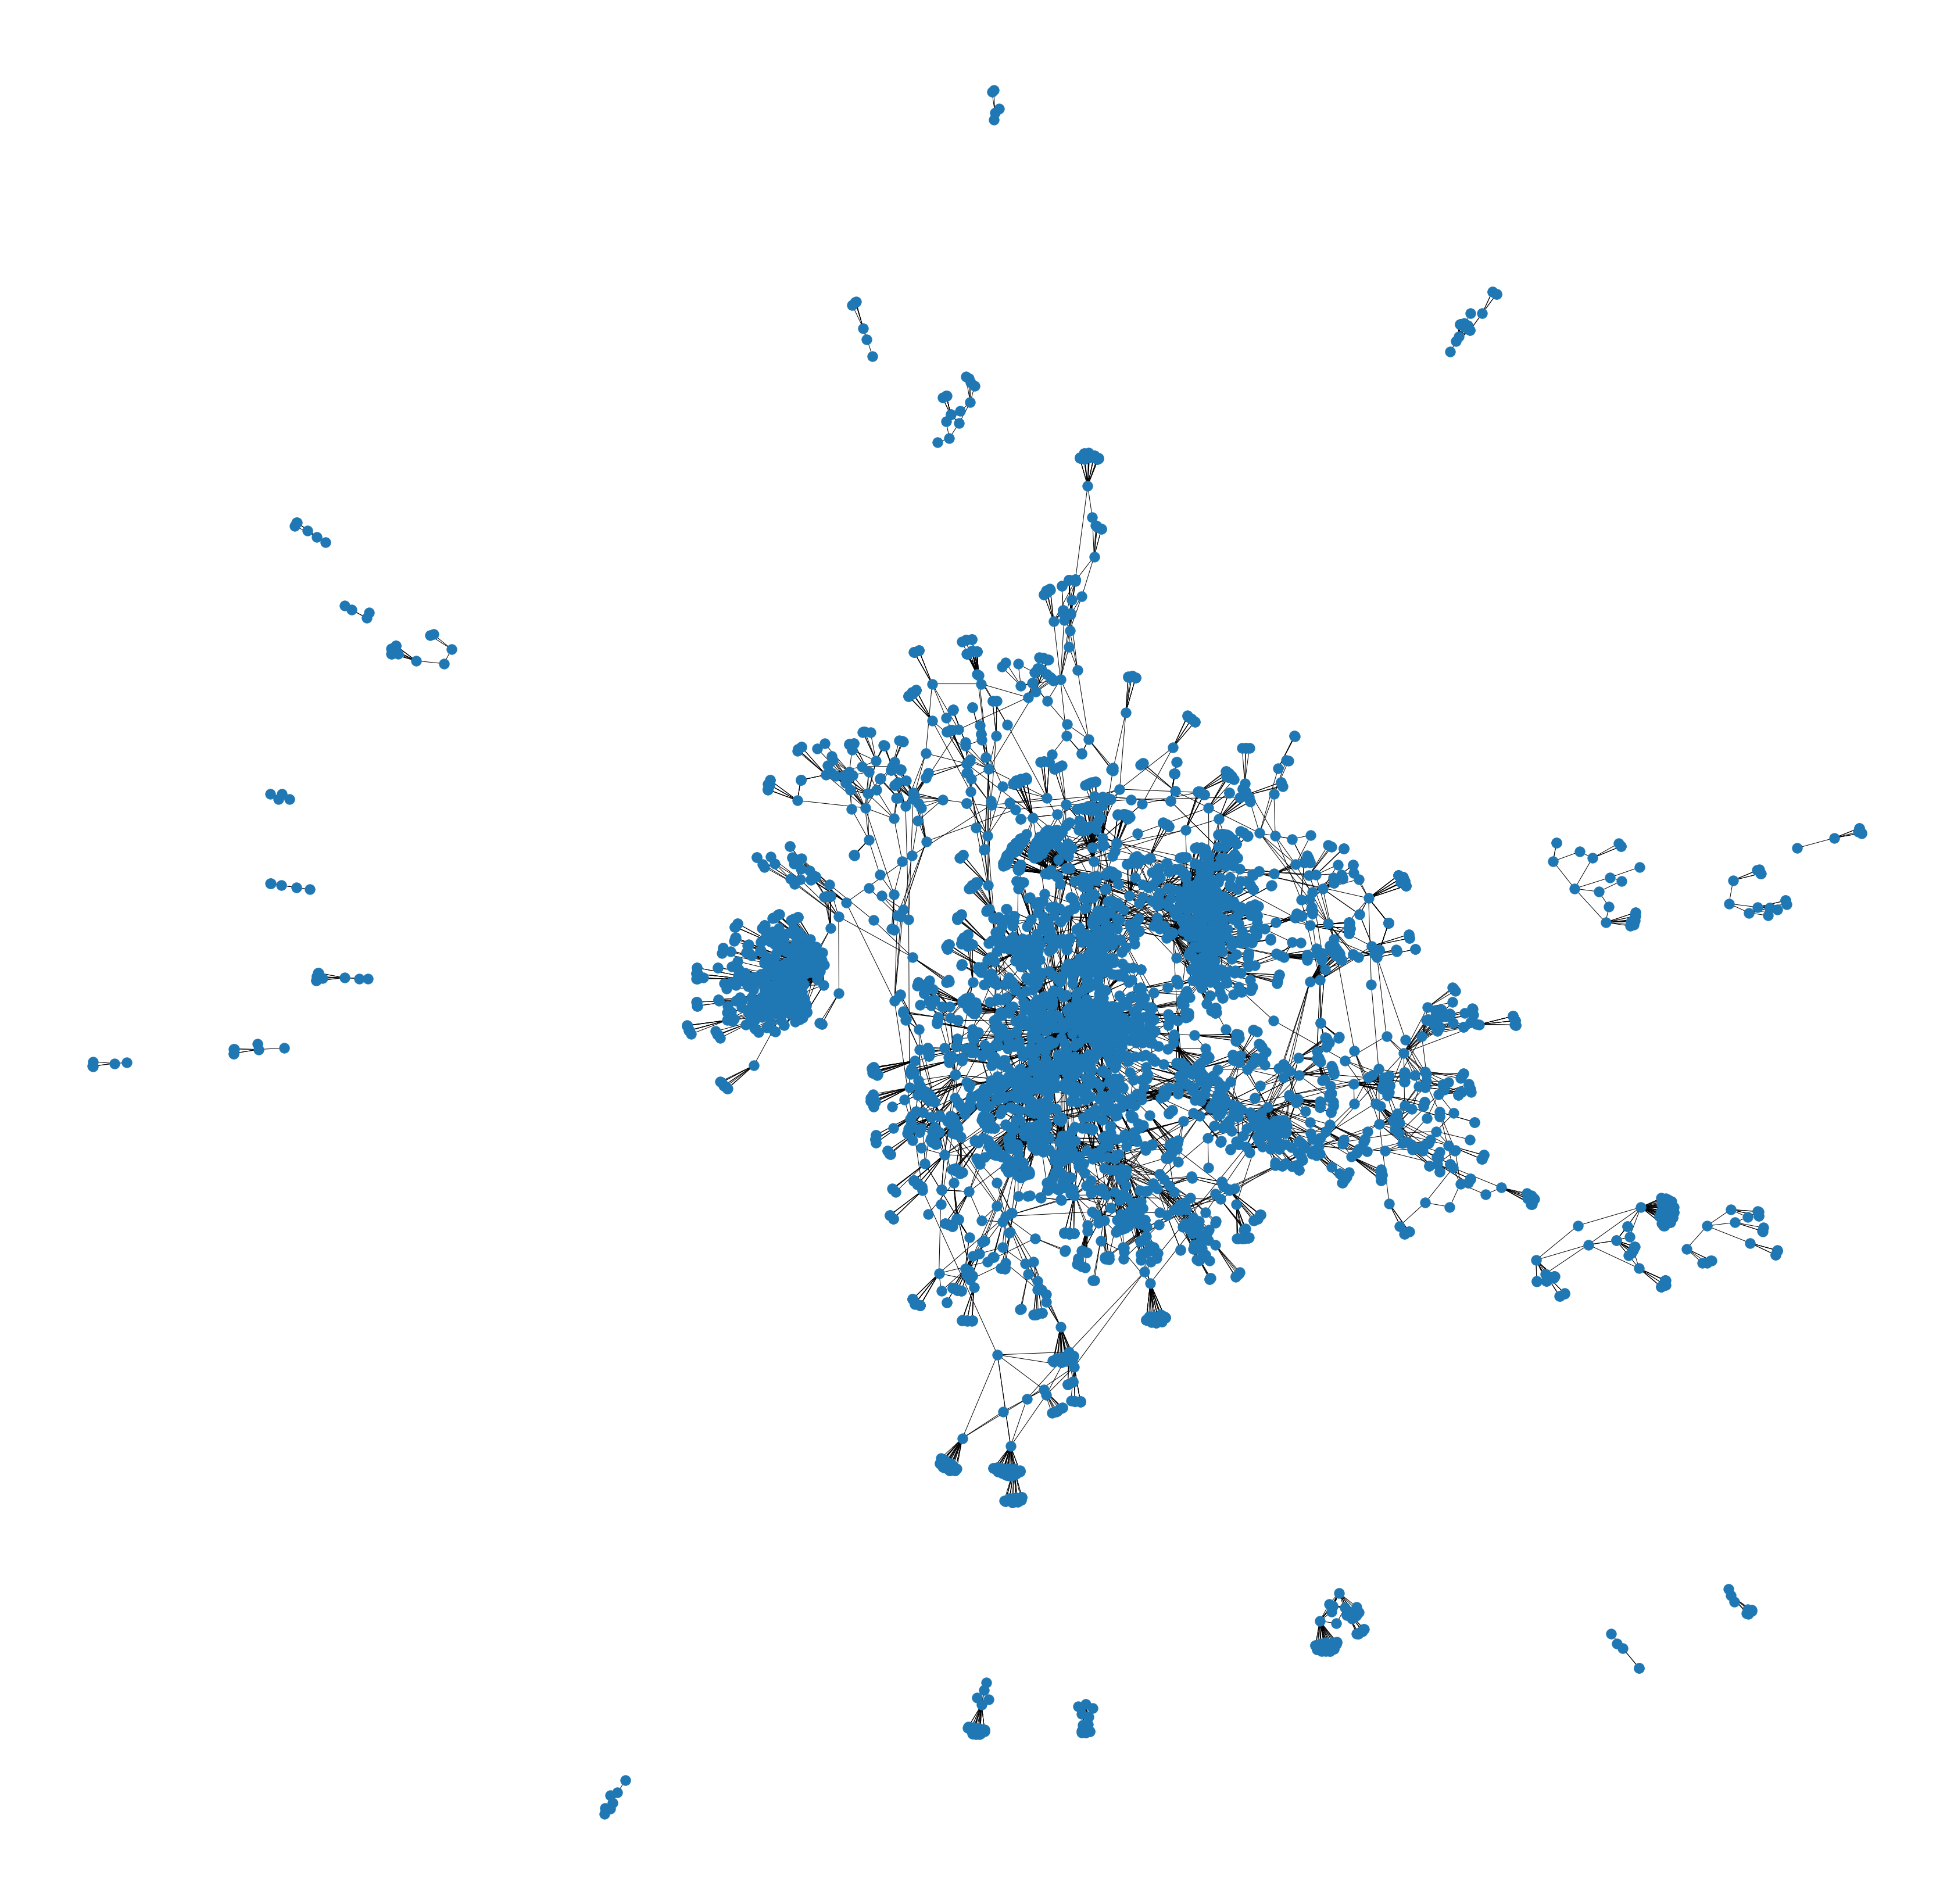

In [0]:
f = plt.figure(figsize=(60,60))
plt.subplot(111)
nx.draw(G, with_labels=False, font_weight='bold')

### Finding the number of roots and leaves in the big graph

In [0]:
bigGraphTuple = [tuple([x, y]) for x, y in zip(dfBigGraph[(dfBigGraph["eType"] == 0)]["Source"], dfBigGraph[(dfBigGraph["eType"] == 0)]["Target"])]
GD = nx.DiGraph(bigGraphTuple)

rootsBG = (v for v, d in GD.in_degree() if d == 0)
leavesBG = [v for v, d in GD.out_degree() if d == 0]


In [0]:
#print(len(list(rootsBG)))
#print(len(list(leavesBG)))

## Time

### Loading the question 1 graphs

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv')

In [0]:
timeTemplate = dfTemplate["Time"]

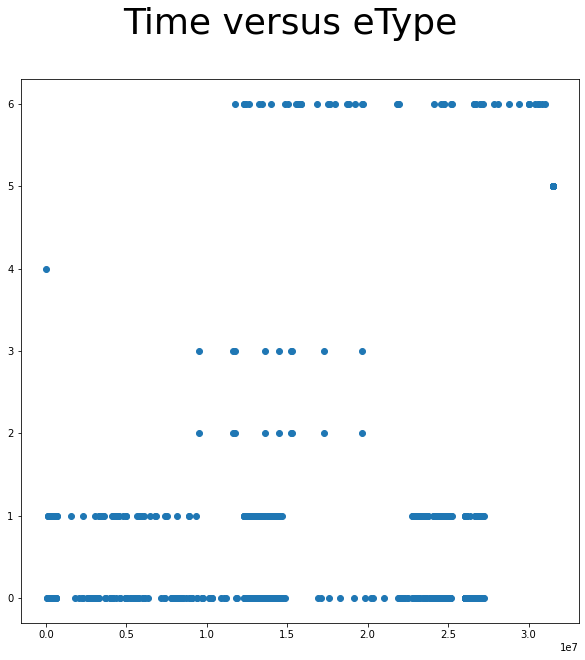

In [0]:
# Setting the graph size
f = plt.figure(figsize=(10,10))

# adding a title for the whole graph
f.suptitle('Time versus eType', fontsize=36)

plt.scatter(timeTemplate, dfTemplate['eType'], s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)

# Plotting the values on the time Scale

## Time versus Source and Target Nodes

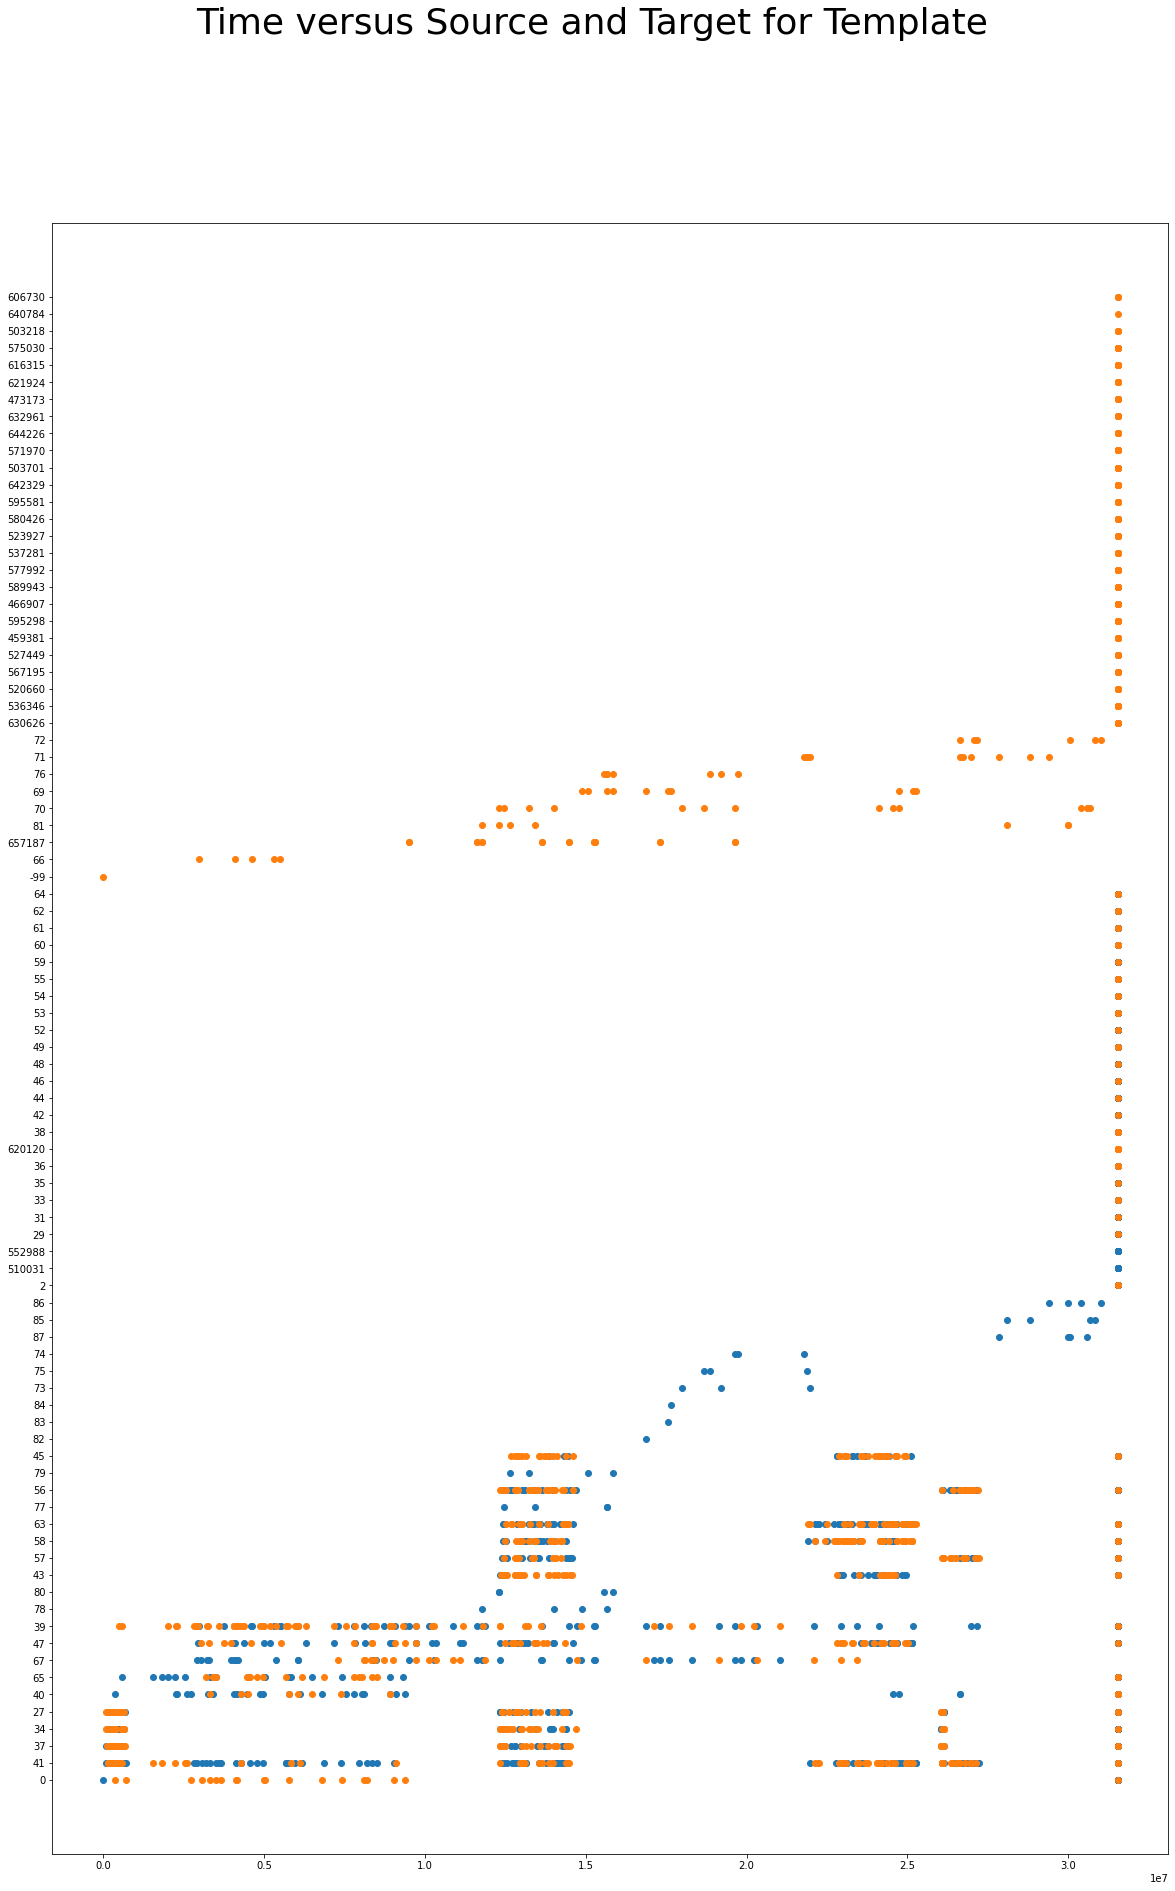

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target for Template', fontsize=36)

timeTemplate = dfTemplate["Time"]
sourceStringList = [str(x) for x in dfTemplate['Source']]
targetStringList = [str(x) for x in dfTemplate['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e') # orange color

plt.show()

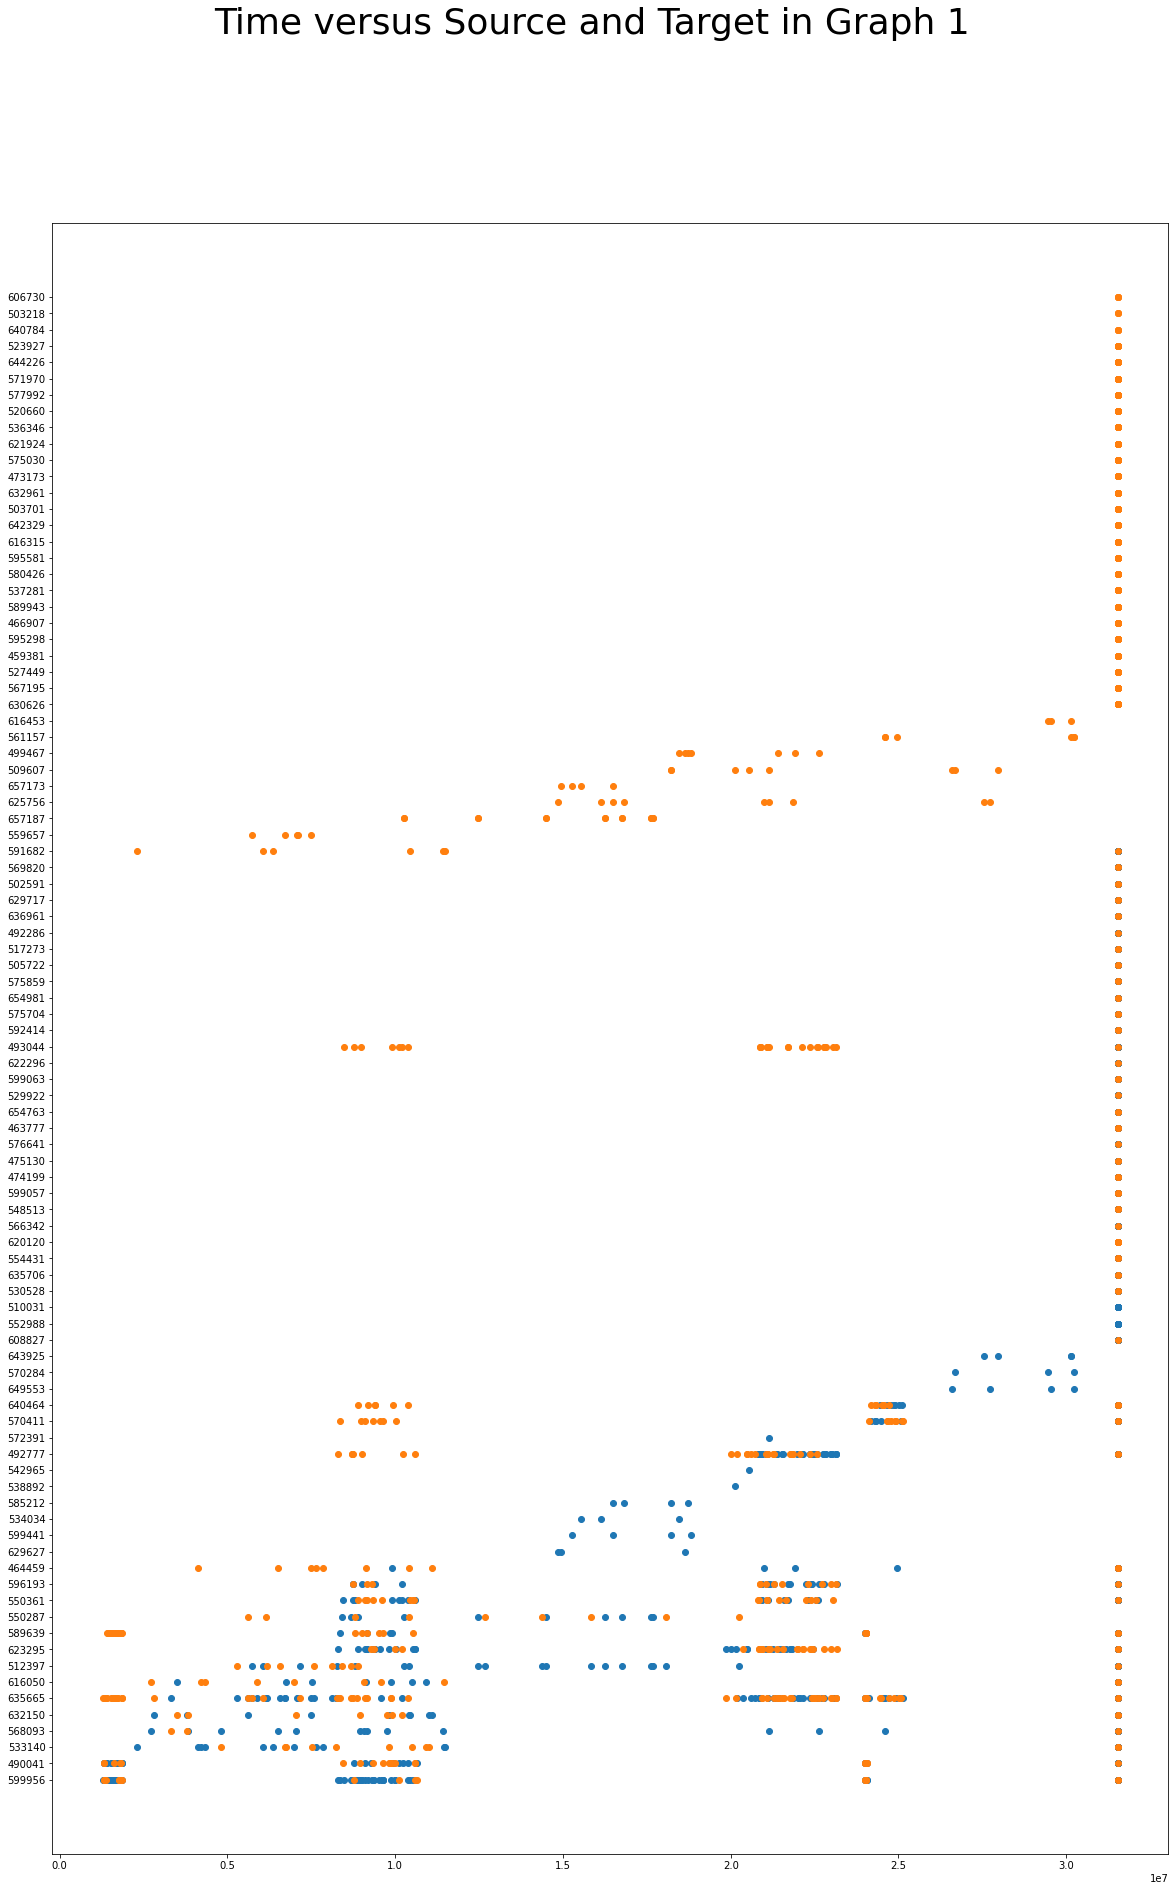

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target in Graph 1', fontsize=36)

timeTemplate = dfGraph1[(dfGraph1["eType"] != 4)]["Time"]
sourceStringList = [str(x) for x in dfGraph1[(dfGraph1["eType"] != 4)]['Source']]
targetStringList = [str(x) for x in dfGraph1[(dfGraph1["eType"] != 4)]['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e')

plt.show()

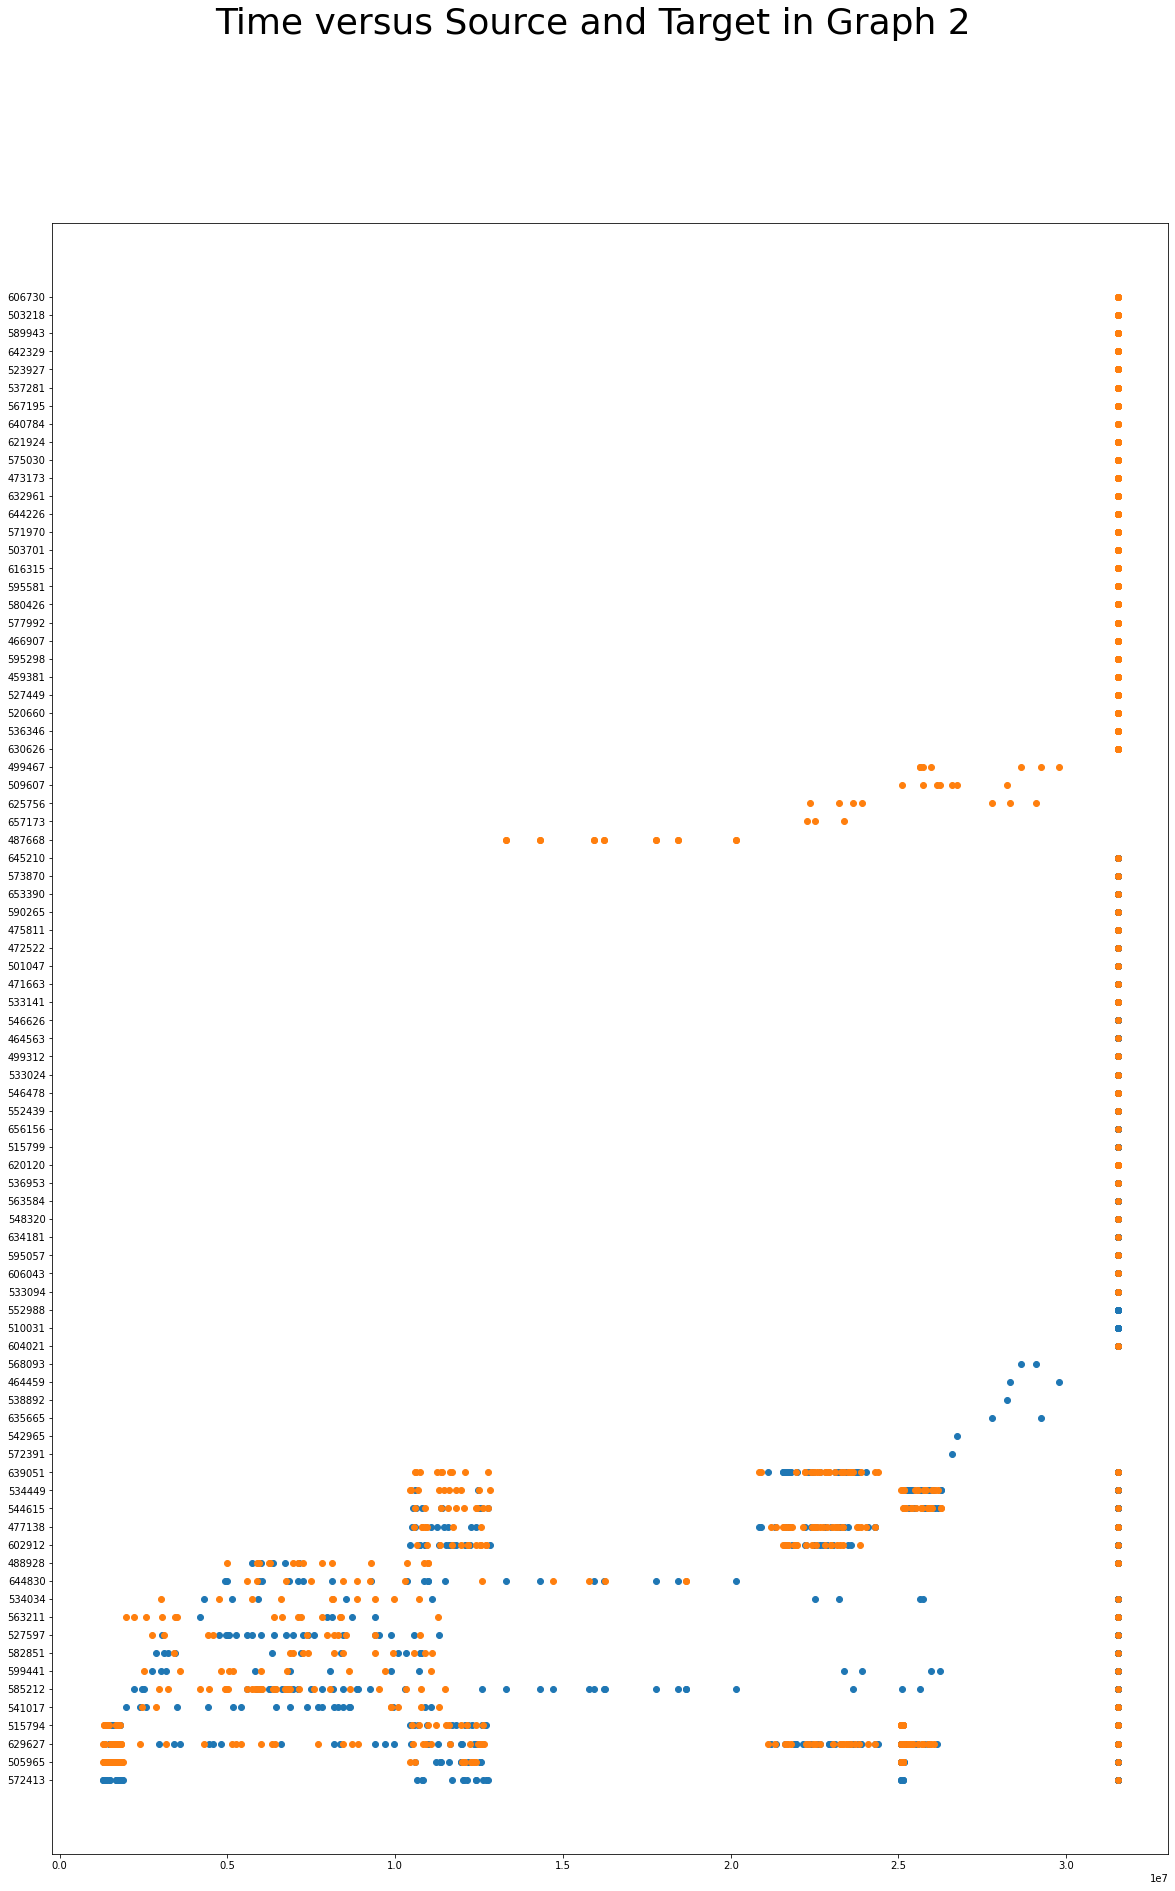

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target in Graph 2', fontsize=36)

timeTemplate = dfGraph2[(dfGraph2["eType"] != 4)]["Time"]
sourceStringList = [str(x) for x in dfGraph2[(dfGraph2["eType"] != 4)]['Source']]
targetStringList = [str(x) for x in dfGraph2[(dfGraph2["eType"] != 4)]['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e')

plt.show()

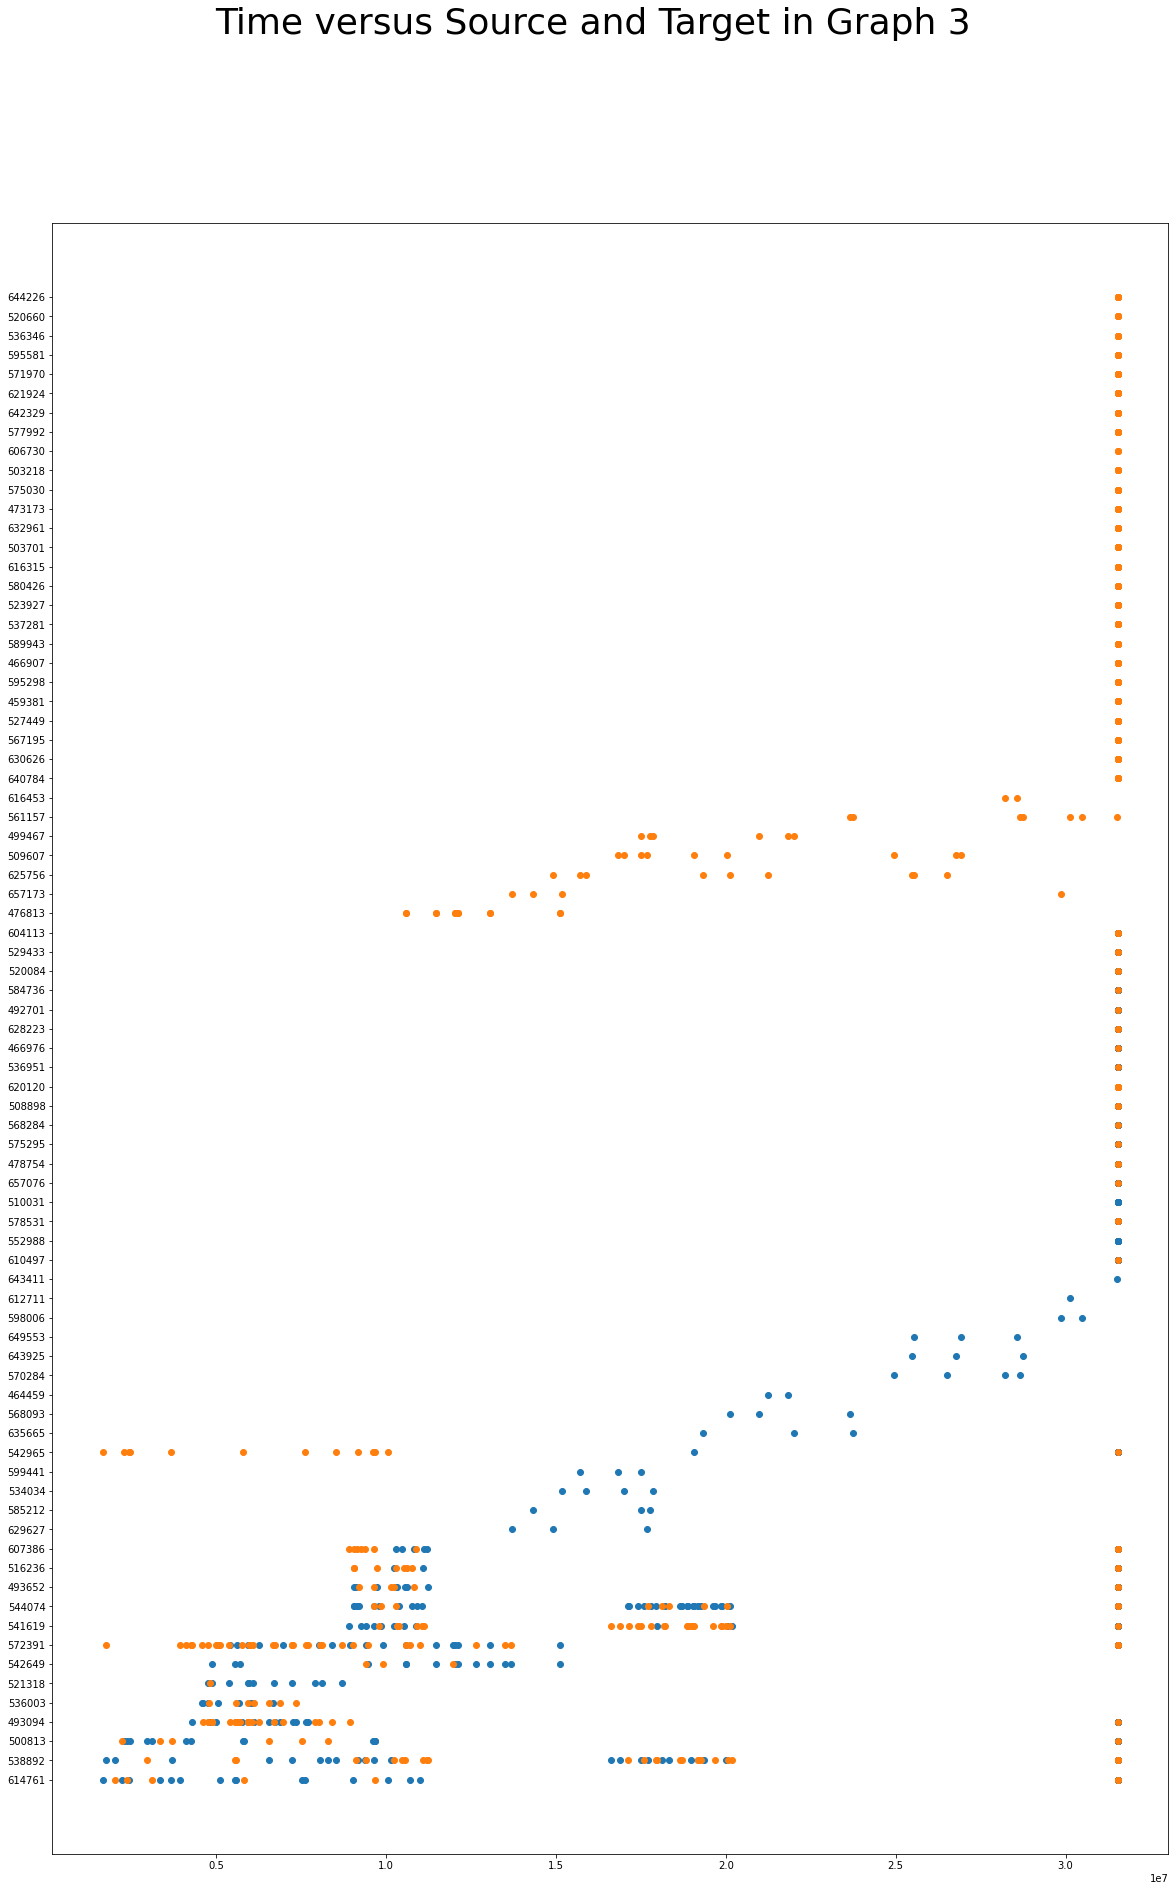

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target in Graph 3', fontsize=36)

timeTemplate = dfGraph3[(dfGraph3["eType"] != 4)]["Time"]
sourceStringList = [str(x) for x in dfGraph3[(dfGraph3["eType"] != 4)]['Source']]
targetStringList = [str(x) for x in dfGraph3[(dfGraph3["eType"] != 4)]['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e')

plt.show()

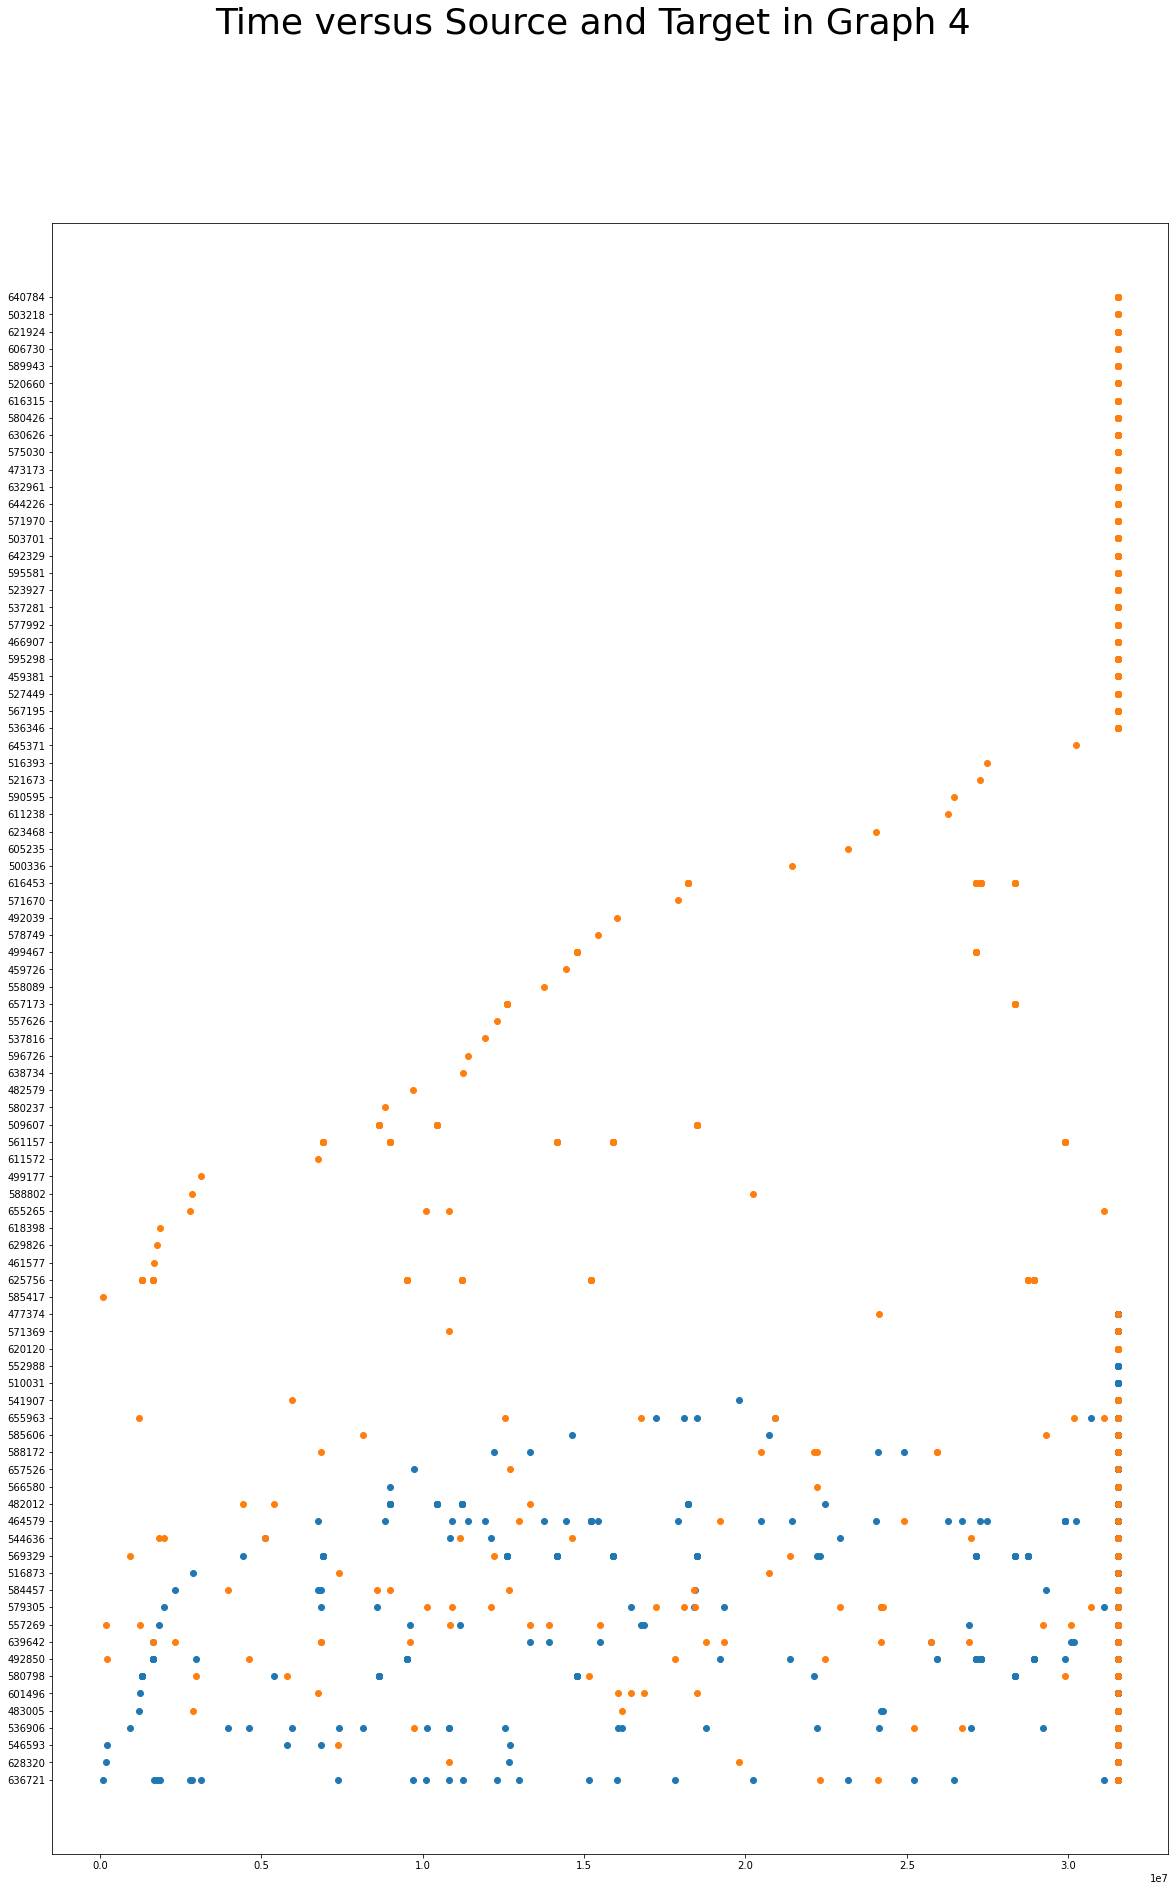

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target in Graph 4', fontsize=36)

timeTemplate = dfGraph4[(dfGraph4["eType"] != 4)]["Time"]
sourceStringList = [str(x) for x in dfGraph4[(dfGraph4["eType"] != 4)]['Source']]
targetStringList = [str(x) for x in dfGraph4[(dfGraph4["eType"] != 4)]['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e')

plt.show()

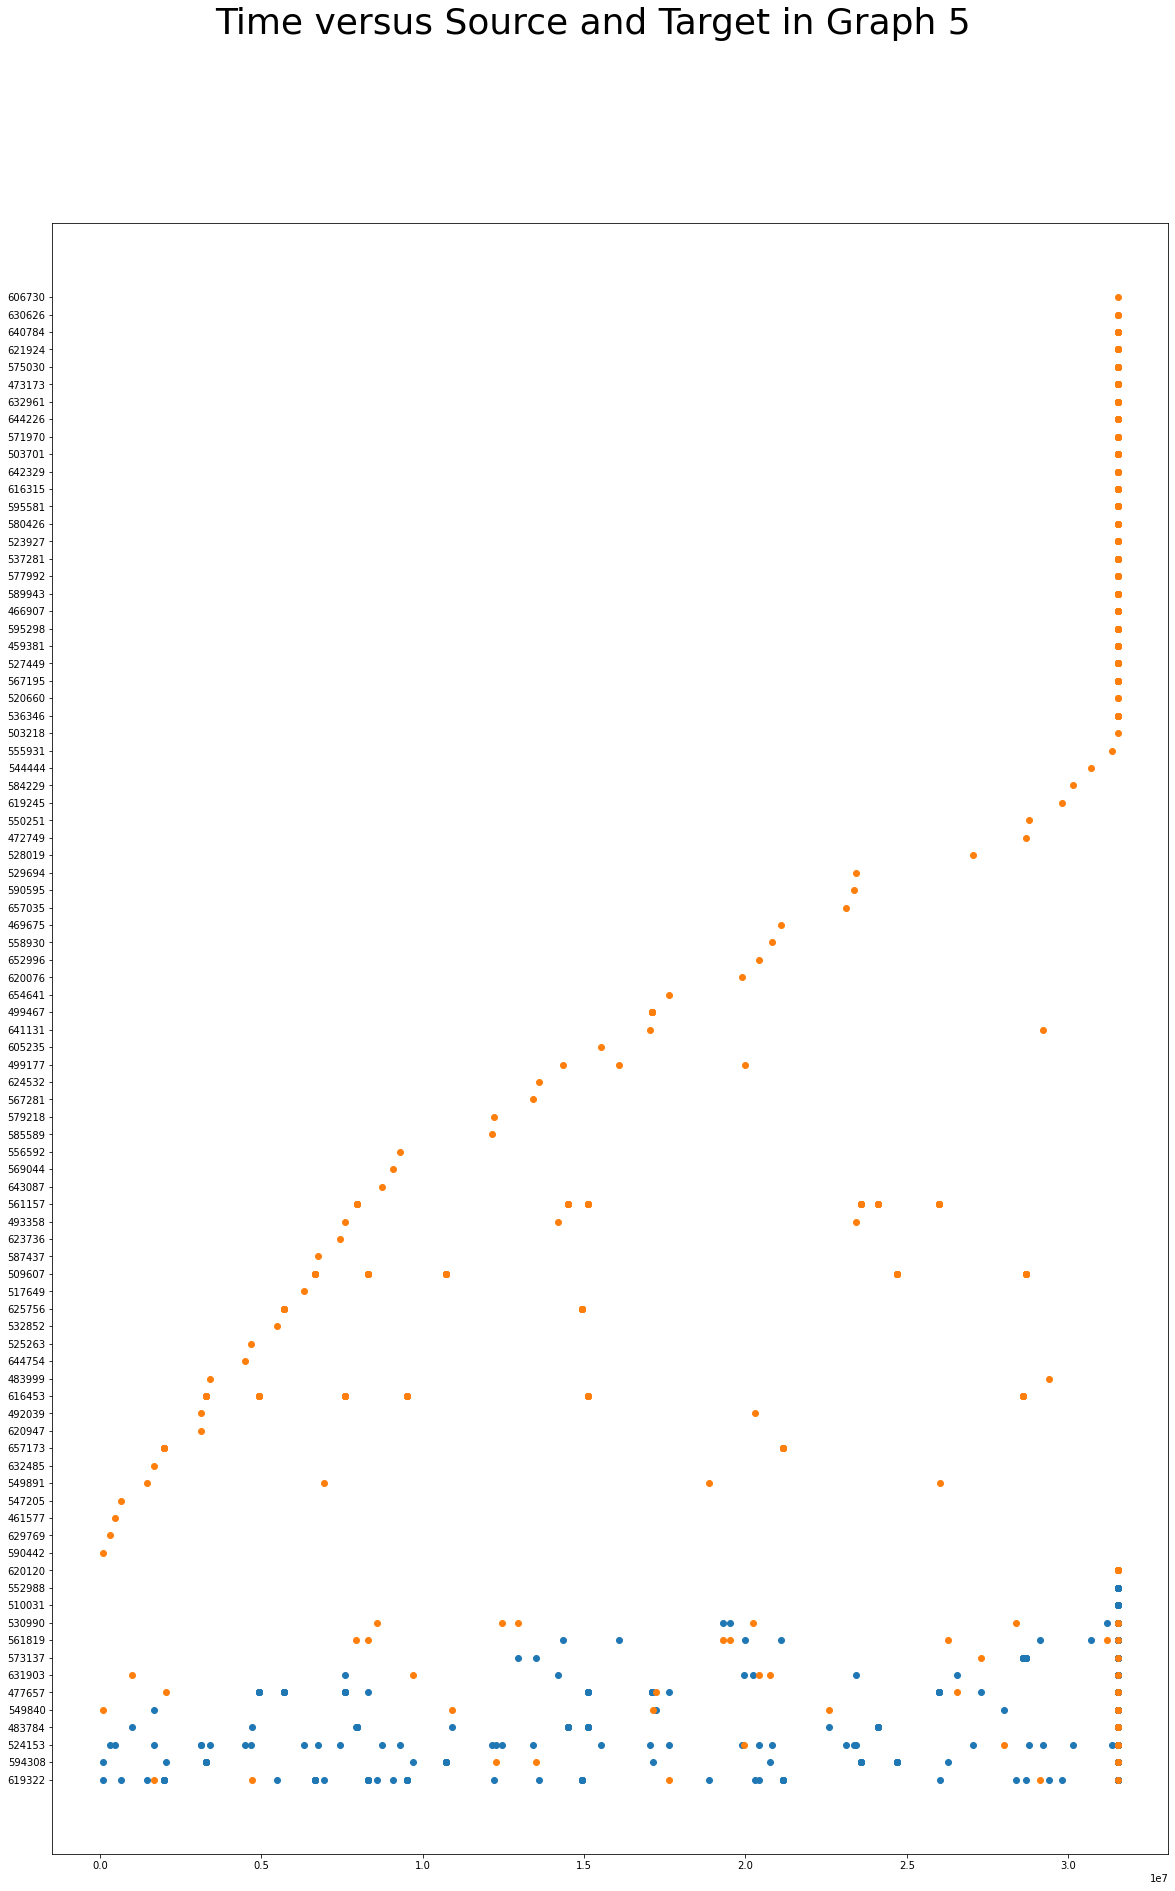

In [0]:
# Setting the graph size
f = plt.figure(figsize=(20,30))

# adding a title for the whole graph
f.suptitle('Time versus Source and Target in Graph 5', fontsize=36)

timeTemplate = dfGraph5[(dfGraph5["eType"] != 4)]["Time"]
sourceStringList = [str(x) for x in dfGraph5[(dfGraph5["eType"] != 4)]['Source']]
targetStringList = [str(x) for x in dfGraph5[(dfGraph5["eType"] != 4)]['Target']]

plt.scatter(timeTemplate, sourceStringList, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.scatter(timeTemplate, targetStringList, c='#ff7f0e')

plt.show()

# Interactive Plots

In [0]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [8]:
init_notebook_mode(connected=True)

In [9]:
cf.go_offline()

In [0]:
dfTemplate = pd.read_csv('drive/My Drive/data/CGCS-Template.csv')
dfGraph1 = pd.read_csv('drive/My Drive/data/Q1-Graph1.csv')
dfGraph2 = pd.read_csv('drive/My Drive/data/Q1-Graph2.csv')
dfGraph3 = pd.read_csv('drive/My Drive/data/Q1-Graph3.csv')
dfGraph4 = pd.read_csv('drive/My Drive/data/Q1-Graph4.csv')
dfGraph5 = pd.read_csv('drive/My Drive/data/Q1-Graph5.csv') 

In [61]:
timeTemplate = [int(x) for x in dfTemplate["Time"]]
sourceStringList = [str(x) for x in dfTemplate['Source']]
sourceStringList = np.transpose(np.array(sourceStringList))
targetStringList = [str(x) for x in dfTemplate['Target']]
targetStringList = np.transpose(np.array(targetStringList))
print(sourceStringList.shape, targetStringList.shape)

(1325,) (1325,)


In [0]:
# moving to pandas dataframe
timeTemplatePandas = pd.DataFrame(np.transpose(np.array([sourceStringList, targetStringList, timeTemplate, dfTemplate['eType']])), columns="SourceId TargetId Time eType".split())
#timeTemplatePandas.astype({'Time': 'int32'}).dtypes
timeTemplatePandas["Time"] = pd.to_numeric(timeTemplatePandas["Time"])
#pd.to_datetime()

In [91]:
timeTemplatePandas.TargetId.apply(str)

0          -99
1           34
2           27
3           27
4           37
         ...  
1320    644226
1321    473173
1322    620120
1323    575030
1324    621924
Name: TargetId, Length: 1325, dtype: object

In [87]:
timeTemplatePandas.head()

SourceId TargetId    Time
0        0      -99     -99
1       41       34   86400
2       37       27   94461
3       34       27  107548
4       41       37  127838

In [88]:
timeTemplatePandas.dtypes

SourceId    object
TargetId    object
Time         int64
dtype: object

In [79]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [0]:
pio.renderers.default = 'colab'

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [0]:
import plotly.express as px

In [0]:
#[fig, fig2]

In [129]:
'''fig = px.scatter(x=timeTemplatePandas['Time'], y =timeTemplatePandas['SourceId'], color=timeTemplatePandas["eType"])
fig.update_layout(yaxis_type='category',
                  title_text='Scatter plot Source Ids based on time')

fig.show()
fig2 = px.scatter(x=timeTemplatePandas['Time'], y =timeTemplatePandas['TargetId'], color=timeTemplatePandas["eType"])
fig2.update_layout(yaxis_type='category',
                  title_text='Scatter plot Target Ids based on time')

fig2.show()
'''

'fig = px.scatter(x=timeTemplatePandas[\'Time\'], y =timeTemplatePandas[\'SourceId\'], color=timeTemplatePandas["eType"])\nfig.update_layout(yaxis_type=\'category\',\n                  title_text=\'Scatter plot Source Ids based on time\')\n\nfig.show()\nfig2 = px.scatter(x=timeTemplatePandas[\'Time\'], y =timeTemplatePandas[\'TargetId\'], color=timeTemplatePandas["eType"])\nfig2.update_layout(yaxis_type=\'category\',\n                  title_text=\'Scatter plot Target Ids based on time\')\n\nfig2.show()\n'

In [131]:
fig = px.scatter(x=dfTemplate[dfTemplate['eType'] != 4]['Time'], y =dfTemplate[dfTemplate['eType'] != 4]['Source'], color=dfTemplate[dfTemplate['eType'] != 4]["eType"].astype(str))
fig.update_layout(yaxis_type='category',
                  title_text='Scatter plot Source Ids based on time for Template')

fig.show()
fig2 = px.scatter(x=dfTemplate[dfTemplate['eType'] != 4]['Time'], y =dfTemplate[dfTemplate['eType'] != 4]['Target'], color=dfTemplate[dfTemplate['eType'] != 4]["eType"].astype(str))
fig2.update_layout(yaxis_type='category',
                  title_text='Scatter plot Target Ids based on time for Template')

fig2.show()

In [132]:
fig = px.scatter(x=dfGraph1[dfGraph1['eType'] != 4]['Time'], y =dfGraph1[dfGraph1['eType'] != 4]['Source'], color=dfGraph1[dfGraph1['eType'] != 4]["eType"].astype(str))
fig.update_layout(yaxis_type='category',
                  title_text='Scatter plot Source Ids based on time for Graph 1')

fig.show()
fig2 = px.scatter(x=dfGraph1[dfGraph1['eType'] != 4]['Time'], y =dfGraph1[dfGraph1['eType'] != 4]['Target'], color=dfGraph1[dfGraph1['eType'] != 4]["eType"].astype(str))
fig2.update_layout(yaxis_type='category',
                  title_text='Scatter plot Target Ids based on time for Graph 1')

fig2.show()

In [133]:
fig = px.scatter(x=dfGraph5[dfGraph5['eType'] != 4]['Time'], y =dfGraph5[dfGraph5['eType'] != 4]['Source'], color=dfGraph5[dfGraph5['eType'] != 4]["eType"].astype(str))
fig.update_layout(yaxis_type='category',
                  title_text='Scatter plot Source Ids based on time for Graph 5')

fig.show()
fig2 = px.scatter(x=dfGraph5[dfGraph5['eType'] != 4]['Time'], y =dfGraph5[dfGraph5['eType'] != 4]['Target'], color=dfGraph5[dfGraph5['eType'] != 4]["eType"].astype(str))
fig2.update_layout(yaxis_type='category',
                  title_text='Scatter plot Target Ids based on time for Graph 5')

fig2.show()

In [0]:
#timeTemplatePandas.iplot(kind='scatter', x="Time", y="TargetId", mode="markers", xa)
#timeTemplatePandas.iplot(kind='scatter', x="Time", y="SourceId", mode="markers", colors='blue')

In [0]:
import plotly.graph_objects as go


In [116]:
'''
trace1 = go.Scatter(
    x=timeTemplatePandas['Time'],
    y=timeTemplatePandas['SourceId']
)
trace2 = go.Scatter(
    x=timeTemplatePandas['Time'],
    y=timeTemplatePandas['TargetId'],
    yaxis="y2"
)
data = [trace1, trace2]
layout = go.Layout(
    yaxis=dict(
        domain=[0, 0.33]
    ),
    legend=dict(
        traceorder="reversed"
    ),
    yaxis2=dict(
        domain=[0.33, 0.66]
    ),
    yaxis3=dict(
        domain=[0.66, 1]
    )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(yaxis_type='category',
                  title_text='Scatter plot with categorical axes')
fig.show()
'''

'\ntrace1 = go.Scatter(\n    x=timeTemplatePandas[\'Time\'],\n    y=timeTemplatePandas[\'SourceId\']\n)\ntrace2 = go.Scatter(\n    x=timeTemplatePandas[\'Time\'],\n    y=timeTemplatePandas[\'TargetId\'],\n    yaxis="y2"\n)\ndata = [trace1, trace2]\nlayout = go.Layout(\n    yaxis=dict(\n        domain=[0, 0.33]\n    ),\n    legend=dict(\n        traceorder="reversed"\n    ),\n    yaxis2=dict(\n        domain=[0.33, 0.66]\n    ),\n    yaxis3=dict(\n        domain=[0.66, 1]\n    )\n)\nfig = go.Figure(data=data, layout=layout)\nfig.update_layout(yaxis_type=\'category\',\n                  title_text=\'Scatter plot with categorical axes\')\nfig.show()\n'